In [27]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import sys

# Generate csv for instance level RT summary

In [28]:
first_round_csv_path = "/Users/kiyoshi/Desktop/mturk_results_db/second_round_40_classes/0730/processed.csv"
# sec_round_csv_path = "/Users/kiyoshi/Desktop/mturk_results/second_round_40_classes/0730/processed.csv"

In [29]:
original_csv_pd = pd.read_csv(first_round_csv_path)

In [30]:
header = ["index", "assignment_id", "survey_index", "date_time", "host", "novel_class", "answer", "correct", "image_list", "rt"]
original_csv_pd.columns = header

In [31]:
rt_pd = original_csv_pd[["novel_class", "image_list", "rt"]]

In [32]:
img_pd = rt_pd.image_list.str.split(',',expand=True)

In [33]:
img_header = ["img1","img2","img3","img4","img5","img6"]
img_pd.columns = img_header

In [34]:
img_pd = img_pd[["img1","img2","img3","img4","img5"]]
img_pd.head(3)

img1  \
0  'dataset_v1/known_classes/images/val/00326/000...   
1  'dataset_v1/known_classes/images/val/00126/000...   
2  'dataset_v1/known_classes/images/val/00392/000...   

                                                img2  \
0   'dataset_v1/known_classes/images/val/00326/00...   
1   'dataset_v1/known_classes/images/val/00397/00...   
2   'dataset_v1/known_classes/images/val/00035/00...   

                                                img3  \
0   'dataset_v1/known_classes/images/val/00326/00...   
1   'dataset_v1/known_classes/images/val/00397/00...   
2   'dataset_v1/known_classes/images/val/00392/00...   

                                                img4  \
0   'dataset_v1/known_classes/images/val/00326/00...   
1   'dataset_v1/known_classes/images/val/00397/00...   
2   'dataset_v1/known_classes/images/val/00392/00...   

                                                img5  
0   'dataset_v1/known_classes/images/val/00140/00...  
1   'dataset_v1/known_classes/images/val/00397/00...  
2   'dataset_v1/known_classes/images/val/00392/00...

In [35]:
rt_img_pd = pd.concat([rt_pd, img_pd], axis=1)

In [36]:
del rt_img_pd['image_list']

In [37]:
rt_img_pd.head(3)

novel_class    rt                                               img1  \
0          140  6452  'dataset_v1/known_classes/images/val/00326/000...   
1          126  3985  'dataset_v1/known_classes/images/val/00126/000...   
2           35  5825  'dataset_v1/known_classes/images/val/00392/000...   

                                                img2  \
0   'dataset_v1/known_classes/images/val/00326/00...   
1   'dataset_v1/known_classes/images/val/00397/00...   
2   'dataset_v1/known_classes/images/val/00035/00...   

                                                img3  \
0   'dataset_v1/known_classes/images/val/00326/00...   
1   'dataset_v1/known_classes/images/val/00397/00...   
2   'dataset_v1/known_classes/images/val/00392/00...   

                                                img4  \
0   'dataset_v1/known_classes/images/val/00326/00...   
1   'dataset_v1/known_classes/images/val/00397/00...   
2   'dataset_v1/known_classes/images/val/00392/00...   

                                                img5  
0   'dataset_v1/known_classes/images/val/00140/00...  
1   'dataset_v1/known_classes/images/val/00397/00...  
2   'dataset_v1/known_classes/images/val/00392/00...

In [38]:
rt_img_pd.reset_index(drop=True).to_csv(path_or_buf="/Users/kiyoshi/Desktop/mturk_results_db/second_round_40_classes/0730/instance_rt_processed_second_round.csv")

# process csv and get instance level csv

In [39]:
first_round = "/Users/kiyoshi/Desktop/mturk_results_db/second_round_40_classes/0730/instance_rt_processed_second_round.csv"
save_first_round = "/Users/kiyoshi/Desktop/mturk_results_db/second_round_40_classes/0730/instance_rt_processed_second_round.npy"

In [40]:
second_round = None

In [41]:
from numpy import genfromtxt
np_data = genfromtxt(first_round, delimiter=',', dtype=None, encoding="utf-8")

In [42]:
np_data[1]

(0, '140', '6452', "'dataset_v1/known_classes/images/val/00326/00060.JPEG'", " 'dataset_v1/known_classes/images/val/00326/00046.JPEG'", " 'dataset_v1/known_classes/images/val/00326/00061.JPEG'", " 'dataset_v1/known_classes/images/val/00326/00098.JPEG'", " 'dataset_v1/known_classes/images/val/00140/00099.JPEG'")

In [43]:
save_data = []

for i in range(1, np_data.shape[0]):
# for i in range(1, 100):
    one_row = np_data[i]
    img_path = None
    
    class_label = one_row[1]
    rt = one_row[2]
    
    img_1_label = one_row[3][37:42]
    img_2_label = one_row[4][38:43]
    img_3_label = one_row[5][38:43]
    img_4_label = one_row[6][38:43]
    img_5_label = one_row[7][38:43]
        
    if class_label.zfill(5) == img_1_label:
        img_path = one_row[3][36:-1]
    elif class_label.zfill(5) == img_2_label:
        img_path = one_row[4][37:-1]
    elif class_label.zfill(5) == img_3_label:
        img_path = one_row[5][37:-1]
    elif class_label.zfill(5) == img_4_label:
        img_path = one_row[6][37:-1]
    elif class_label.zfill(5) == img_5_label:
        img_path = one_row[7][37:-1]
        
    print(img_path)
    
    save_data.append([img_path[1:6], img_path[7:] , rt])
    
np.save(save_first_round, save_data)
print("NPY file saved!")

/00140/00099.JPEG
/00126/00051.JPEG
/00035/00055.JPEG
/00015/00057.JPEG
/00038/00101.JPEG
/00160/00012.JPEG
/00309/00099.JPEG
/00160/00015.JPEG
/00382/00078.JPEG
/00128/00060.JPEG
/00300/00072.JPEG
/00035/00057.JPEG
/00188/00055.JPEG
/00188/00071.JPEG
/00119/00062.JPEG
/00201/00060.JPEG
/00151/00063.JPEG
/00408/00020.JPEG
/00151/00027.JPEG
/00151/00007.JPEG
/00140/00099.JPEG
/00126/00051.JPEG
/00035/00055.JPEG
/00015/00057.JPEG
/00038/00101.JPEG
/00160/00012.JPEG
/00140/00099.JPEG
/00124/00031.JPEG
/00140/00099.JPEG
/00140/00068.JPEG
/00124/00031.JPEG
/00119/00010.JPEG
/00126/00051.JPEG
/00124/00049.JPEG
/00126/00051.JPEG
/00150/00028.JPEG
/00140/00068.JPEG
/00201/00102.JPEG
/00119/00010.JPEG
/00126/00037.JPEG
/00407/00014.JPEG
/00124/00031.JPEG
/00124/00049.JPEG
/00035/00055.JPEG
/00035/00055.JPEG
/00408/00023.JPEG
/00150/00028.JPEG
/00124/00031.JPEG
/00015/00057.JPEG
/00201/00102.JPEG
/00140/00068.JPEG
/00015/00057.JPEG
/00119/00010.JPEG
/00126/00037.JPEG
/00140/00068.JPEG
/00038/001

/00140/00015.JPEG
/00128/00018.JPEG
/00038/00073.JPEG
/00140/00015.JPEG
/00385/00088.JPEG
/00301/00086.JPEG
/00397/00008.JPEG
/00014/00053.JPEG
/00397/00008.JPEG
/00203/00078.JPEG
/00119/00015.JPEG
/00407/00098.JPEG
/00035/00018.JPEG
/00201/00099.JPEG
/00397/00041.JPEG
/00397/00041.JPEG
/00300/00059.JPEG
/00160/00023.JPEG
/00203/00068.JPEG
/00371/00002.JPEG
/00397/00008.JPEG
/00300/00073.JPEG
/00201/00099.JPEG
/00392/00027.JPEG
/00310/00061.JPEG
/00255/00097.JPEG
/00326/00055.JPEG
/00014/00053.JPEG
/00014/00044.JPEG
/00300/00073.JPEG
/00125/00048.JPEG
/00408/00064.JPEG
/00300/00090.JPEG
/00397/00041.JPEG
/00203/00068.JPEG
/00119/00019.JPEG
/00385/00017.JPEG
/00301/00088.JPEG
/00385/00037.JPEG
/00150/00043.JPEG
/00119/00019.JPEG
/00150/00043.JPEG
/00371/00077.JPEG
/00401/00018.JPEG
/00371/00010.JPEG
/00014/00017.JPEG
/00392/00088.JPEG
/00392/00088.JPEG
/00196/00086.JPEG
/00128/00011.JPEG
/00014/00017.JPEG
/00301/00086.JPEG
/00371/00010.JPEG
/00392/00085.JPEG
/00300/00073.JPEG
/00255/000

/00342/00024.JPEG
/00385/00096.JPEG
/00188/00070.JPEG
/00125/00035.JPEG
/00160/00027.JPEG
/00385/00096.JPEG
/00397/00047.JPEG
/00385/00096.JPEG
/00342/00026.JPEG
/00151/00034.JPEG
/00382/00058.JPEG
/00385/00096.JPEG
/00300/00009.JPEG
/00151/00034.JPEG
/00125/00035.JPEG
/00385/00096.JPEG
/00407/00064.JPEG
/00038/00240.JPEG
/00382/00014.JPEG
/00382/00014.JPEG
/00015/00044.JPEG
/00401/00036.JPEG
/00077/00021.JPEG
/00300/00015.JPEG
/00203/00094.JPEG
/00188/00038.JPEG
/00188/00038.JPEG
/00203/00088.JPEG
/00077/00092.JPEG
/00392/00036.JPEG
/00300/00009.JPEG
/00015/00044.JPEG
/00160/00013.JPEG
/00151/00034.JPEG
/00128/00030.JPEG
/00268/00040.JPEG
/00160/00013.JPEG
/00397/00032.JPEG
/00203/00088.JPEG
/00300/00067.JPEG
/00015/00044.JPEG
/00268/00053.JPEG
/00397/00032.JPEG
/00382/00014.JPEG
/00014/00097.JPEG
/00203/00088.JPEG
/00371/00014.JPEG
/00128/00078.JPEG
/00397/00032.JPEG
/00188/00041.JPEG
/00188/00079.JPEG
/00268/00053.JPEG
/00268/00076.JPEG
/00188/00038.JPEG
/00188/00041.JPEG
/00014/000

/00267/00084.JPEG
/00397/00028.JPEG
/00128/00080.JPEG
/00407/00062.JPEG
/00408/00031.JPEG
/00391/00084.JPEG
/00035/00075.JPEG
/00140/00077.JPEG
/00125/00065.JPEG
/00072/00107.JPEG
/00125/00065.JPEG
/00014/00028.JPEG
/00126/00048.JPEG
/00160/00063.JPEG
/00407/00000.JPEG
/00401/00016.JPEG
/00160/00077.JPEG
/00203/00081.JPEG
/00128/00013.JPEG
/00342/00041.JPEG
/00140/00089.JPEG
/00128/00080.JPEG
/00408/00031.JPEG
/00391/00084.JPEG
/00014/00028.JPEG
/00035/00075.JPEG
/00140/00077.JPEG
/00203/00081.JPEG
/00267/00084.JPEG
/00267/00084.JPEG
/00397/00028.JPEG
/00407/00062.JPEG
/00342/00021.JPEG
/00126/00048.JPEG
/00397/00028.JPEG
/00124/00061.JPEG
/00160/00063.JPEG
/00342/00021.JPEG
/00267/00094.JPEG
/00310/00052.JPEG
/00119/00069.JPEG
/00124/00061.JPEG
/00407/00062.JPEG
/00326/00007.JPEG
/00407/00000.JPEG
/00035/00021.JPEG
/00128/00099.JPEG
/00126/00041.JPEG
/00396/00077.JPEG
/00342/00021.JPEG
/00342/00021.JPEG
/00342/00021.JPEG
/00139/00028.JPEG
/00124/00061.JPEG
/00188/00092.JPEG
/00267/000

/00385/00077.JPEG
/00309/00015.JPEG
/00015/00045.JPEG
/00309/00080.JPEG
/00342/00048.JPEG
/00015/00066.JPEG
/00408/00095.JPEG
/00342/00058.JPEG
/00392/00013.JPEG
/00188/00073.JPEG
/00309/00015.JPEG
/00408/00099.JPEG
/00342/00094.JPEG
/00139/00017.JPEG
/00151/00070.JPEG
/00160/00076.JPEG
/00201/00147.JPEG
/00201/00066.JPEG
/00342/00021.JPEG
/00401/00022.JPEG
/00309/00000.JPEG
/00150/00005.JPEG
/00124/00093.JPEG
/00188/00073.JPEG
/00150/00001.JPEG
/00196/00017.JPEG
/00160/00072.JPEG
/00255/00020.JPEG
/00035/00089.JPEG
/00268/00069.JPEG
/00015/00040.JPEG
/00309/00037.JPEG
/00267/00016.JPEG
/00342/00021.JPEG
/00201/00051.JPEG
/00038/00175.JPEG
/00268/00085.JPEG
/00392/00086.JPEG
/00392/00013.JPEG
/00301/00014.JPEG
/00015/00032.JPEG
/00125/00013.JPEG
/00300/00076.JPEG
/00396/00069.JPEG
/00268/00069.JPEG
/00126/00035.JPEG
/00196/00032.JPEG
/00371/00049.JPEG
/00392/00097.JPEG
/00015/00053.JPEG
/00139/00099.JPEG
/00124/00003.JPEG
/00301/00014.JPEG
/00310/00089.JPEG
/00150/00005.JPEG
/00255/000

/00267/00054.JPEG
/00267/00054.JPEG
/00077/00013.JPEG
/00035/00068.JPEG
/00126/00056.JPEG
/00201/00130.JPEG
/00255/00016.JPEG
/00124/00095.JPEG
/00124/00095.JPEG
/00125/00034.JPEG
/00401/00063.JPEG
/00077/00017.JPEG
/00382/00055.JPEG
/00397/00047.JPEG
/00139/00021.JPEG
/00326/00083.JPEG
/00125/00034.JPEG
/00201/00130.JPEG
/00310/00018.JPEG
/00077/00013.JPEG
/00373/00020.JPEG
/00035/00050.JPEG
/00373/00066.JPEG
/00392/00081.JPEG
/00301/00070.JPEG
/00124/00095.JPEG
/00139/00021.JPEG
/00385/00023.JPEG
/00401/00000.JPEG
/00310/00018.JPEG
/00150/00067.JPEG
/00150/00046.JPEG
/00126/00029.JPEG
/00391/00063.JPEG
/00139/00079.JPEG
/00310/00018.JPEG
/00391/00063.JPEG
/00373/00066.JPEG
/00196/00094.JPEG
/00140/00022.JPEG
/00309/00042.JPEG
/00301/00083.JPEG
/00301/00070.JPEG
/00309/00042.JPEG
/00310/00018.JPEG
/00391/00052.JPEG
/00391/00063.JPEG
/00267/00060.JPEG
/00342/00072.JPEG
/00139/00079.JPEG
/00201/00075.JPEG
/00139/00005.JPEG
/00326/00029.JPEG
/00124/00065.JPEG
/00124/00025.JPEG
/00301/000

/00160/00034.JPEG
/00373/00096.JPEG
/00035/00018.JPEG
/00408/00035.JPEG
/00408/00035.JPEG
/00310/00018.JPEG
/00119/00000.JPEG
/00015/00050.JPEG
/00035/00039.JPEG
/00268/00083.JPEG
/00401/00061.JPEG
/00382/00024.JPEG
/00015/00017.JPEG
/00392/00078.JPEG
/00300/00056.JPEG
/00392/00027.JPEG
/00160/00034.JPEG
/00015/00033.JPEG
/00128/00028.JPEG
/00151/00024.JPEG
/00310/00018.JPEG
/00396/00074.JPEG
/00401/00015.JPEG
/00035/00018.JPEG
/00408/00069.JPEG
/00035/00039.JPEG
/00196/00068.JPEG
/00015/00017.JPEG
/00188/00027.JPEG
/00150/00035.JPEG
/00119/00000.JPEG
/00397/00001.JPEG
/00151/00078.JPEG
/00300/00056.JPEG
/00382/00024.JPEG
/00035/00099.JPEG
/00035/00018.JPEG
/00391/00090.JPEG
/00038/00113.JPEG
/00392/00078.JPEG
/00309/00005.JPEG
/00015/00033.JPEG
/00126/00016.JPEG
/00128/00028.JPEG
/00396/00074.JPEG
/00151/00012.JPEG
/00310/00061.JPEG
/00160/00034.JPEG
/00188/00020.JPEG
/00150/00035.JPEG
/00408/00035.JPEG
/00124/00056.JPEG
/00140/00087.JPEG
/00035/00028.JPEG
/00408/00069.JPEG
/00160/000

/00126/00091.JPEG
/00267/00031.JPEG
/00373/00024.JPEG
/00126/00047.JPEG
/00201/00003.JPEG
/00125/00011.JPEG
/00203/00001.JPEG
/00267/00018.JPEG
/00126/00054.JPEG
/00401/00007.JPEG
/00151/00034.JPEG
/00196/00038.JPEG
/00309/00008.JPEG
/00160/00024.JPEG
/00310/00029.JPEG
/00382/00002.JPEG
/00392/00095.JPEG
/00371/00076.JPEG
/00126/00054.JPEG
/00371/00023.JPEG
/00392/00038.JPEG
/00139/00076.JPEG
/00128/00064.JPEG
/00140/00070.JPEG
/00391/00074.JPEG
/00196/00080.JPEG
/00188/00060.JPEG
/00201/00003.JPEG
/00401/00007.JPEG
/00151/00055.JPEG
/00126/00091.JPEG
/00196/00038.JPEG
/00201/00011.JPEG
/00382/00002.JPEG
/00391/00073.JPEG
/00126/00047.JPEG
/00128/00064.JPEG
/00310/00029.JPEG
/00309/00068.JPEG
/00126/00047.JPEG
/00151/00055.JPEG
/00139/00076.JPEG
/00077/00086.JPEG
/00201/00003.JPEG
/00392/00047.JPEG
/00396/00078.JPEG
/00309/00068.JPEG
/00119/00041.JPEG
/00371/00023.JPEG
/00203/00085.JPEG
/00119/00041.JPEG
/00126/00054.JPEG
/00201/00003.JPEG
/00119/00000.JPEG
/00188/00060.JPEG
/00151/000

/00014/00036.JPEG
/00385/00088.JPEG
/00072/00033.JPEG
/00301/00096.JPEG
/00014/00030.JPEG
/00373/00058.JPEG
/00309/00079.JPEG
/00119/00079.JPEG
/00309/00079.JPEG
/00385/00073.JPEG
/00072/00058.JPEG
/00072/00033.JPEG
/00139/00037.JPEG
/00397/00037.JPEG
/00188/00044.JPEG
/00326/00034.JPEG
/00015/00010.JPEG
/00397/00037.JPEG
/00255/00011.JPEG
/00140/00032.JPEG
/00382/00044.JPEG
/00301/00036.JPEG
/00196/00063.JPEG
/00301/00036.JPEG
/00035/00035.JPEG
/00301/00006.JPEG
/00391/00035.JPEG
/00268/00077.JPEG
/00255/00088.JPEG
/00126/00064.JPEG
/00301/00006.JPEG
/00119/00079.JPEG
/00310/00039.JPEG
/00268/00058.JPEG
/00077/00014.JPEG
/00125/00061.JPEG
/00300/00032.JPEG
/00151/00024.JPEG
/00035/00035.JPEG
/00201/00094.JPEG
/00119/00079.JPEG
/00371/00001.JPEG
/00407/00002.JPEG
/00310/00083.JPEG
/00301/00096.JPEG
/00408/00016.JPEG
/00310/00054.JPEG
/00391/00017.JPEG
/00326/00034.JPEG
/00326/00034.JPEG
/00072/00058.JPEG
/00309/00074.JPEG
/00309/00074.JPEG
/00124/00020.JPEG
/00072/00141.JPEG
/00255/000

/00255/00038.JPEG
/00196/00060.JPEG
/00401/00081.JPEG
/00077/00056.JPEG
/00124/00060.JPEG
/00391/00024.JPEG
/00408/00048.JPEG
/00188/00051.JPEG
/00408/00067.JPEG
/00397/00033.JPEG
/00300/00089.JPEG
/00326/00031.JPEG
/00151/00051.JPEG
/00160/00048.JPEG
/00373/00025.JPEG
/00397/00052.JPEG
/00326/00026.JPEG
/00382/00043.JPEG
/00385/00062.JPEG
/00125/00081.JPEG
/00125/00029.JPEG
/00255/00038.JPEG
/00301/00095.JPEG
/00310/00023.JPEG
/00203/00086.JPEG
/00077/00056.JPEG
/00310/00010.JPEG
/00392/00094.JPEG
/00196/00060.JPEG
/00124/00060.JPEG
/00401/00042.JPEG
/00391/00024.JPEG
/00188/00051.JPEG
/00408/00048.JPEG
/00014/00006.JPEG
/00310/00038.JPEG
/00396/00095.JPEG
/00326/00031.JPEG
/00408/00094.JPEG
/00310/00023.JPEG
/00408/00067.JPEG
/00397/00033.JPEG
/00151/00051.JPEG
/00160/00048.JPEG
/00125/00081.JPEG
/00326/00075.JPEG
/00326/00075.JPEG
/00140/00067.JPEG
/00140/00067.JPEG
/00125/00064.JPEG
/00301/00095.JPEG
/00072/00194.JPEG
/00310/00023.JPEG
/00397/00069.JPEG
/00125/00064.JPEG
/00203/000

/00371/00023.JPEG
/00385/00049.JPEG
/00035/00061.JPEG
/00196/00029.JPEG
/00014/00064.JPEG
/00267/00031.JPEG
/00382/00020.JPEG
/00196/00029.JPEG
/00014/00064.JPEG
/00396/00072.JPEG
/00371/00023.JPEG
/00035/00061.JPEG
/00382/00020.JPEG
/00397/00022.JPEG
/00267/00031.JPEG
/00371/00023.JPEG
/00077/00073.JPEG
/00396/00072.JPEG
/00072/00155.JPEG
/00397/00022.JPEG
/00038/00246.JPEG
/00072/00062.JPEG
/00077/00073.JPEG
/00072/00155.JPEG
/00038/00246.JPEG
/00309/00080.JPEG
/00072/00062.JPEG
/00124/00027.JPEG
/00035/00061.JPEG
/00309/00080.JPEG
/00124/00027.JPEG
/00267/00031.JPEG
/00301/00056.JPEG
/00268/00018.JPEG
/00396/00072.JPEG
/00301/00056.JPEG
/00397/00022.JPEG
/00268/00018.JPEG
/00077/00073.JPEG
/00408/00032.JPEG
/00408/00032.JPEG
/00408/00073.JPEG
/00072/00155.JPEG
/00396/00033.JPEG
/00408/00073.JPEG
/00268/00026.JPEG
/00382/00087.JPEG
/00396/00033.JPEG
/00196/00053.JPEG
/00408/00032.JPEG
/00038/00246.JPEG
/00326/00091.JPEG
/00397/00029.JPEG
/00268/00026.JPEG
/00408/00073.JPEG
/00128/000

/00255/00028.JPEG
/00255/00067.JPEG
/00160/00082.JPEG
/00150/00054.JPEG
/00407/00049.JPEG
/00035/00051.JPEG
/00150/00054.JPEG
/00077/00005.JPEG
/00407/00029.JPEG
/00407/00093.JPEG
/00125/00037.JPEG
/00255/00028.JPEG
/00124/00073.JPEG
/00392/00019.JPEG
/00300/00021.JPEG
/00401/00075.JPEG
/00385/00018.JPEG
/00407/00029.JPEG
/00407/00049.JPEG
/00309/00001.JPEG
/00255/00028.JPEG
/00201/00077.JPEG
/00267/00085.JPEG
/00407/00049.JPEG
/00128/00013.JPEG
/00342/00020.JPEG
/00401/00075.JPEG
/00407/00049.JPEG
/00309/00093.JPEG
/00309/00001.JPEG
/00373/00012.JPEG
/00300/00021.JPEG
/00015/00082.JPEG
/00128/00057.JPEG
/00310/00065.JPEG
/00151/00045.JPEG
/00267/00069.JPEG
/00124/00073.JPEG
/00201/00077.JPEG
/00401/00075.JPEG
/00128/00004.JPEG
/00128/00057.JPEG
/00300/00027.JPEG
/00255/00067.JPEG
/00035/00072.JPEG
/00407/00029.JPEG
/00310/00061.JPEG
/00373/00027.JPEG
/00267/00069.JPEG
/00201/00138.JPEG
/00015/00082.JPEG
/00309/00093.JPEG
/00035/00053.JPEG
/00255/00067.JPEG
/00310/00000.JPEG
/00125/000

/00385/00064.JPEG
/00326/00030.JPEG
/00326/00033.JPEG
/00397/00094.JPEG
/00119/00033.JPEG
/00382/00000.JPEG
/00310/00073.JPEG
/00139/00065.JPEG
/00385/00013.JPEG
/00126/00086.JPEG
/00310/00032.JPEG
/00150/00000.JPEG
/00126/00044.JPEG
/00150/00059.JPEG
/00267/00072.JPEG
/00392/00018.JPEG
/00407/00039.JPEG
/00385/00013.JPEG
/00385/00013.JPEG
/00038/00280.JPEG
/00126/00086.JPEG
/00126/00086.JPEG
/00392/00096.JPEG
/00072/00051.JPEG
/00310/00032.JPEG
/00150/00059.JPEG
/00038/00280.JPEG
/00201/00005.JPEG
/00150/00000.JPEG
/00392/00096.JPEG
/00310/00032.JPEG
/00301/00015.JPEG
/00072/00051.JPEG
/00126/00044.JPEG
/00038/00280.JPEG
/00150/00059.JPEG
/00150/00059.JPEG
/00201/00005.JPEG
/00267/00072.JPEG
/00072/00207.JPEG
/00301/00015.JPEG
/00392/00018.JPEG
/00392/00096.JPEG
/00407/00039.JPEG
/00150/00000.JPEG
/00397/00044.JPEG
/00072/00051.JPEG
/00014/00078.JPEG
/00072/00207.JPEG
/00150/00059.JPEG
/00072/00005.JPEG
/00267/00021.JPEG
/00201/00005.JPEG
/00203/00038.JPEG
/00072/00005.JPEG
/00301/000

/00150/00002.JPEG
/00150/00077.JPEG
/00401/00011.JPEG
/00255/00018.JPEG
/00140/00007.JPEG
/00267/00053.JPEG
/00196/00091.JPEG
/00255/00018.JPEG
/00015/00063.JPEG
/00126/00057.JPEG
/00201/00008.JPEG
/00140/00007.JPEG
/00015/00059.JPEG
/00196/00091.JPEG
/00382/00021.JPEG
/00015/00063.JPEG
/00126/00057.JPEG
/00196/00001.JPEG
/00201/00008.JPEG
/00015/00059.JPEG
/00371/00085.JPEG
/00382/00021.JPEG
/00196/00001.JPEG
/00371/00085.JPEG
/00035/00077.JPEG
/00373/00043.JPEG
/00035/00077.JPEG
/00401/00072.JPEG
/00267/00053.JPEG
/00373/00043.JPEG
/00392/00053.JPEG
/00401/00072.JPEG
/00150/00002.JPEG
/00267/00053.JPEG
/00392/00053.JPEG
/00150/00002.JPEG
/00397/00043.JPEG
/00150/00077.JPEG
/00401/00011.JPEG
/00397/00043.JPEG
/00267/00053.JPEG
/00150/00077.JPEG
/00401/00011.JPEG
/00397/00064.JPEG
/00267/00053.JPEG
/00382/00063.JPEG
/00255/00018.JPEG
/00140/00007.JPEG
/00255/00018.JPEG
/00309/00075.JPEG
/00140/00007.JPEG
/00196/00091.JPEG
/00342/00061.JPEG
/00015/00063.JPEG
/00196/00091.JPEG
/00126/000

/00128/00035.JPEG
/00301/00087.JPEG
/00119/00065.JPEG
/00396/00052.JPEG
/00126/00041.JPEG
/00300/00008.JPEG
/00038/00224.JPEG
/00371/00055.JPEG
/00255/00030.JPEG
/00015/00074.JPEG
/00408/00025.JPEG
/00397/00009.JPEG
/00300/00053.JPEG
/00371/00094.JPEG
/00309/00031.JPEG
/00119/00018.JPEG
/00128/00035.JPEG
/00301/00087.JPEG
/00407/00001.JPEG
/00407/00080.JPEG
/00119/00065.JPEG
/00326/00045.JPEG
/00396/00052.JPEG
/00126/00041.JPEG
/00300/00071.JPEG
/00300/00008.JPEG
/00038/00224.JPEG
/00371/00055.JPEG
/00255/00030.JPEG
/00015/00074.JPEG
/00408/00025.JPEG
/00397/00009.JPEG
/00119/00018.JPEG
/00407/00001.JPEG
/00407/00080.JPEG
/00201/00063.JPEG
/00396/00061.JPEG
/00077/00029.JPEG
/00326/00079.JPEG
/00326/00045.JPEG
/00125/00055.JPEG
/00300/00071.JPEG
/00300/00025.JPEG
/00268/00059.JPEG
/00371/00006.JPEG
/00255/00017.JPEG
/00268/00069.JPEG
/00300/00081.JPEG
/00196/00074.JPEG
/00125/00089.JPEG
/00119/00085.JPEG
/00196/00022.JPEG
/00268/00083.JPEG
/00196/00036.JPEG
/00126/00065.JPEG
/00201/000

/00126/00076.JPEG
/00014/00053.JPEG
/00396/00097.JPEG
/00309/00093.JPEG
/00255/00026.JPEG
/00201/00003.JPEG
/00401/00019.JPEG
/00126/00076.JPEG
/00015/00018.JPEG
/00309/00093.JPEG
/00160/00008.JPEG
/00385/00068.JPEG
/00126/00040.JPEG
/00035/00078.JPEG
/00342/00075.JPEG
/00385/00096.JPEG
/00300/00071.JPEG
/00401/00019.JPEG
/00160/00008.JPEG
/00038/00241.JPEG
/00392/00095.JPEG
/00124/00007.JPEG
/00196/00047.JPEG
/00038/00045.JPEG
/00392/00095.JPEG
/00150/00037.JPEG
/00373/00011.JPEG
/00300/00071.JPEG
/00035/00078.JPEG
/00255/00026.JPEG
/00203/00072.JPEG
/00139/00075.JPEG
/00255/00026.JPEG
/00160/00008.JPEG
/00124/00031.JPEG
/00342/00075.JPEG
/00188/00059.JPEG
/00151/00029.JPEG
/00124/00007.JPEG
/00401/00056.JPEG
/00392/00095.JPEG
/00342/00075.JPEG
/00196/00047.JPEG
/00300/00074.JPEG
/00255/00026.JPEG
/00014/00051.JPEG
/00309/00005.JPEG
/00015/00015.JPEG
/00125/00068.JPEG
/00203/00072.JPEG
/00408/00084.JPEG
/00139/00075.JPEG
/00203/00072.JPEG
/00035/00059.JPEG
/00014/00053.JPEG
/00342/000

/00038/00220.JPEG
/00326/00012.JPEG
/00140/00016.JPEG
/00301/00045.JPEG
/00125/00009.JPEG
/00267/00087.JPEG
/00342/00041.JPEG
/00196/00058.JPEG
/00401/00013.JPEG
/00015/00085.JPEG
/00407/00050.JPEG
/00301/00045.JPEG
/00196/00058.JPEG
/00139/00087.JPEG
/00310/00028.JPEG
/00396/00073.JPEG
/00326/00011.JPEG
/00373/00016.JPEG
/00310/00028.JPEG
/00309/00082.JPEG
/00326/00012.JPEG
/00373/00016.JPEG
/00160/00055.JPEG
/00267/00087.JPEG
/00188/00079.JPEG
/00342/00041.JPEG
/00125/00071.JPEG
/00326/00012.JPEG
/00188/00079.JPEG
/00342/00040.JPEG
/00385/00092.JPEG
/00267/00087.JPEG
/00160/00094.JPEG
/00385/00092.JPEG
/00072/00051.JPEG
/00015/00085.JPEG
/00342/00041.JPEG
/00301/00045.JPEG
/00391/00041.JPEG
/00015/00085.JPEG
/00077/00098.JPEG
/00326/00012.JPEG
/00196/00058.JPEG
/00160/00094.JPEG
/00301/00045.JPEG
/00267/00087.JPEG
/00196/00021.JPEG
/00310/00028.JPEG
/00268/00037.JPEG
/00196/00058.JPEG
/00373/00016.JPEG
/00342/00041.JPEG
/00126/00084.JPEG
/00391/00041.JPEG
/00072/00113.JPEG
/00310/000

/00077/00088.JPEG
/00119/00048.JPEG
/00391/00080.JPEG
/00396/00005.JPEG
/00119/00061.JPEG
/00128/00095.JPEG
/00309/00069.JPEG
/00196/00068.JPEG
/00401/00047.JPEG
/00201/00094.JPEG
/00310/00093.JPEG
/00119/00061.JPEG
/00309/00069.JPEG
/00160/00017.JPEG
/00401/00047.JPEG
/00124/00026.JPEG
/00119/00061.JPEG
/00309/00069.JPEG
/00310/00093.JPEG
/00035/00078.JPEG
/00401/00047.JPEG
/00160/00017.JPEG
/00310/00093.JPEG
/00397/00035.JPEG
/00124/00026.JPEG
/00160/00017.JPEG
/00371/00081.JPEG
/00035/00078.JPEG
/00119/00061.JPEG
/00397/00035.JPEG
/00124/00026.JPEG
/00309/00069.JPEG
/00371/00081.JPEG
/00140/00061.JPEG
/00035/00078.JPEG
/00140/00061.JPEG
/00401/00047.JPEG
/00310/00093.JPEG
/00119/00061.JPEG
/00140/00000.JPEG
/00397/00035.JPEG
/00201/00112.JPEG
/00309/00069.JPEG
/00371/00081.JPEG
/00160/00017.JPEG
/00038/00040.JPEG
/00140/00000.JPEG
/00124/00026.JPEG
/00201/00112.JPEG
/00015/00009.JPEG
/00401/00047.JPEG
/00140/00061.JPEG
/00038/00040.JPEG
/00310/00093.JPEG
/00015/00009.JPEG
/00035/000

/00408/00065.JPEG
/00038/00282.JPEG
/00397/00053.JPEG
/00035/00035.JPEG
/00038/00010.JPEG
/00038/00282.JPEG
/00151/00011.JPEG
/00035/00035.JPEG
/00072/00227.JPEG
/00401/00026.JPEG
/00188/00076.JPEG
/00373/00010.JPEG
/00255/00099.JPEG
/00301/00095.JPEG
/00151/00011.JPEG
/00038/00282.JPEG
/00126/00041.JPEG
/00035/00035.JPEG
/00408/00065.JPEG
/00309/00054.JPEG
/00373/00010.JPEG
/00151/00011.JPEG
/00014/00055.JPEG
/00126/00041.JPEG
/00373/00010.JPEG
/00124/00073.JPEG
/00126/00041.JPEG
/00188/00076.JPEG
/00385/00059.JPEG
/00014/00055.JPEG
/00014/00055.JPEG
/00124/00073.JPEG
/00326/00024.JPEG
/00309/00054.JPEG
/00124/00073.JPEG
/00385/00059.JPEG
/00301/00091.JPEG
/00326/00024.JPEG
/00196/00060.JPEG
/00385/00059.JPEG
/00396/00069.JPEG
/00396/00014.JPEG
/00392/00002.JPEG
/00326/00024.JPEG
/00301/00091.JPEG
/00396/00069.JPEG
/00396/00051.JPEG
/00301/00091.JPEG
/00196/00060.JPEG
/00392/00002.JPEG
/00396/00069.JPEG
/00268/00030.JPEG
/00392/00002.JPEG
/00396/00000.JPEG
/00396/00014.JPEG
/00038/000

/00125/00045.JPEG
/00342/00035.JPEG
/00151/00079.JPEG
/00072/00123.JPEG
/00015/00014.JPEG
/00124/00064.JPEG
/00151/00021.JPEG
/00401/00064.JPEG
/00151/00079.JPEG
/00342/00035.JPEG
/00119/00057.JPEG
/00119/00077.JPEG
/00072/00123.JPEG
/00382/00004.JPEG
/00371/00097.JPEG
/00119/00057.JPEG
/00397/00004.JPEG
/00391/00023.JPEG
/00407/00005.JPEG
/00035/00054.JPEG
/00035/00054.JPEG
/00392/00062.JPEG
/00392/00008.JPEG
/00015/00068.JPEG
/00407/00005.JPEG
/00201/00048.JPEG
/00140/00037.JPEG
/00035/00008.JPEG
/00119/00081.JPEG
/00119/00052.JPEG
/00035/00008.JPEG
/00373/00075.JPEG
/00310/00075.JPEG
/00015/00045.JPEG
/00373/00075.JPEG
/00151/00079.JPEG
/00382/00010.JPEG
/00300/00008.JPEG
/00342/00066.JPEG
/00160/00042.JPEG
/00300/00008.JPEG
/00407/00005.JPEG
/00382/00067.JPEG
/00119/00018.JPEG
/00072/00123.JPEG
/00119/00018.JPEG
/00373/00075.JPEG
/00309/00042.JPEG
/00371/00097.JPEG
/00072/00123.JPEG
/00124/00064.JPEG
/00301/00097.JPEG
/00396/00063.JPEG
/00300/00052.JPEG
/00326/00053.JPEG
/00326/000

/00196/00072.JPEG
/00188/00039.JPEG
/00188/00039.JPEG
/00408/00034.JPEG
/00391/00047.JPEG
/00126/00064.JPEG
/00326/00028.JPEG
/00072/00249.JPEG
/00326/00028.JPEG
/00128/00093.JPEG
/00188/00009.JPEG
/00038/00061.JPEG
/00140/00081.JPEG
/00128/00098.JPEG
/00342/00064.JPEG
/00408/00044.JPEG
/00126/00077.JPEG
/00397/00046.JPEG
/00188/00023.JPEG
/00160/00084.JPEG
/00397/00090.JPEG
/00196/00072.JPEG
/00126/00062.JPEG
/00391/00047.JPEG
/00126/00077.JPEG
/00408/00034.JPEG
/00072/00249.JPEG
/00124/00027.JPEG
/00188/00009.JPEG
/00382/00055.JPEG
/00140/00081.JPEG
/00128/00098.JPEG
/00119/00010.JPEG
/00342/00064.JPEG
/00397/00046.JPEG
/00408/00044.JPEG
/00126/00064.JPEG
/00160/00084.JPEG
/00397/00090.JPEG
/00408/00034.JPEG
/00128/00093.JPEG
/00126/00064.JPEG
/00038/00061.JPEG
/00188/00023.JPEG
/00128/00093.JPEG
/00126/00062.JPEG
/00038/00061.JPEG
/00196/00072.JPEG
/00391/00047.JPEG
/00072/00249.JPEG
/00188/00023.JPEG
/00188/00009.JPEG
/00196/00072.JPEG
/00124/00027.JPEG
/00391/00047.JPEG
/00382/000

/00014/00033.JPEG
/00151/00086.JPEG
/00300/00082.JPEG
/00326/00019.JPEG
/00124/00006.JPEG
/00342/00080.JPEG
/00015/00070.JPEG
/00397/00000.JPEG
/00408/00092.JPEG
/00385/00030.JPEG
/00267/00055.JPEG
/00203/00079.JPEG
/00373/00010.JPEG
/00077/00023.JPEG
/00396/00038.JPEG
/00140/00003.JPEG
/00119/00033.JPEG
/00401/00078.JPEG
/00342/00080.JPEG
/00014/00093.JPEG
/00203/00042.JPEG
/00196/00008.JPEG
/00300/00082.JPEG
/00267/00055.JPEG
/00385/00030.JPEG
/00401/00078.JPEG
/00151/00012.JPEG
/00188/00023.JPEG
/00373/00010.JPEG
/00267/00070.JPEG
/00015/00070.JPEG
/00196/00008.JPEG
/00196/00004.JPEG
/00203/00037.JPEG
/00401/00041.JPEG
/00397/00000.JPEG
/00188/00023.JPEG
/00396/00053.JPEG
/00267/00070.JPEG
/00140/00003.JPEG
/00401/00041.JPEG
/00188/00055.JPEG
/00196/00004.JPEG
/00188/00055.JPEG
/00124/00014.JPEG
/00124/00014.JPEG
/00128/00030.JPEG
/00203/00037.JPEG
/00125/00093.JPEG
/00119/00033.JPEG
/00128/00030.JPEG
/00125/00093.JPEG
/00326/00019.JPEG
/00014/00033.JPEG
/00203/00079.JPEG
/00326/000

/00382/00029.JPEG
/00326/00025.JPEG
/00268/00072.JPEG
/00382/00043.JPEG
/00014/00019.JPEG
/00385/00005.JPEG
/00038/00059.JPEG
/00267/00079.JPEG
/00201/00046.JPEG
/00373/00078.JPEG
/00382/00026.JPEG
/00201/00027.JPEG
/00407/00019.JPEG
/00255/00042.JPEG
/00326/00025.JPEG
/00014/00083.JPEG
/00373/00076.JPEG
/00373/00078.JPEG
/00126/00007.JPEG
/00371/00067.JPEG
/00326/00025.JPEG
/00119/00072.JPEG
/00326/00076.JPEG
/00150/00031.JPEG
/00140/00035.JPEG
/00371/00021.JPEG
/00128/00059.JPEG
/00391/00026.JPEG
/00151/00015.JPEG
/00385/00089.JPEG
/00373/00078.JPEG
/00077/00063.JPEG
/00140/00051.JPEG
/00128/00059.JPEG
/00300/00079.JPEG
/00035/00086.JPEG
/00077/00063.JPEG
/00391/00039.JPEG
/00126/00008.JPEG
/00373/00078.JPEG
/00391/00076.JPEG
/00401/00062.JPEG
/00309/00013.JPEG
/00408/00009.JPEG
/00392/00093.JPEG
/00014/00019.JPEG
/00267/00073.JPEG
/00196/00082.JPEG
/00196/00082.JPEG
/00119/00097.JPEG
/00268/00002.JPEG
/00128/00043.JPEG
/00128/00059.JPEG
/00150/00056.JPEG
/00201/00114.JPEG
/00396/000

/00309/00098.JPEG
/00150/00049.JPEG
/00309/00059.JPEG
/00151/00007.JPEG
/00038/00035.JPEG
/00196/00021.JPEG
/00371/00087.JPEG
/00119/00068.JPEG
/00382/00009.JPEG
/00326/00097.JPEG
/00301/00014.JPEG
/00301/00082.JPEG
/00342/00056.JPEG
/00077/00008.JPEG
/00407/00069.JPEG
/00268/00042.JPEG
/00255/00042.JPEG
/00301/00026.JPEG
/00140/00063.JPEG
/00373/00025.JPEG
/00300/00084.JPEG
/00401/00044.JPEG
/00140/00034.JPEG
/00310/00071.JPEG
/00128/00008.JPEG
/00326/00027.JPEG
/00309/00059.JPEG
/00038/00035.JPEG
/00373/00077.JPEG
/00126/00041.JPEG
/00407/00045.JPEG
/00014/00094.JPEG
/00196/00059.JPEG
/00119/00021.JPEG
/00309/00098.JPEG
/00151/00007.JPEG
/00196/00021.JPEG
/00382/00009.JPEG
/00301/00014.JPEG
/00342/00056.JPEG
/00407/00069.JPEG
/00268/00042.JPEG
/00326/00097.JPEG
/00301/00026.JPEG
/00140/00063.JPEG
/00300/00084.JPEG
/00326/00097.JPEG
/00301/00026.JPEG
/00140/00063.JPEG
/00300/00084.JPEG
/00140/00034.JPEG
/00128/00008.JPEG
/00373/00077.JPEG
/00140/00034.JPEG
/00126/00041.JPEG
/00128/000

/00301/00090.JPEG
/00072/00061.JPEG
/00196/00086.JPEG
/00396/00009.JPEG
/00310/00015.JPEG
/00201/00085.JPEG
/00391/00058.JPEG
/00309/00020.JPEG
/00310/00015.JPEG
/00125/00063.JPEG
/00301/00062.JPEG
/00268/00094.JPEG
/00139/00091.JPEG
/00301/00062.JPEG
/00255/00058.JPEG
/00125/00063.JPEG
/00301/00062.JPEG
/00268/00094.JPEG
/00300/00061.JPEG
/00139/00091.JPEG
/00255/00058.JPEG
/00300/00061.JPEG
/00125/00063.JPEG
/00150/00098.JPEG
/00077/00068.JPEG
/00150/00098.JPEG
/00125/00063.JPEG
/00391/00051.JPEG
/00077/00068.JPEG
/00268/00094.JPEG
/00072/00140.JPEG
/00391/00051.JPEG
/00268/00094.JPEG
/00072/00140.JPEG
/00300/00011.JPEG
/00300/00011.JPEG
/00139/00091.JPEG
/00326/00022.JPEG
/00326/00022.JPEG
/00267/00062.JPEG
/00267/00062.JPEG
/00408/00044.JPEG
/00408/00044.JPEG
/00401/00023.JPEG
/00401/00023.JPEG
/00391/00043.JPEG
/00301/00090.JPEG
/00391/00043.JPEG
/00255/00058.JPEG
/00301/00090.JPEG
/00396/00009.JPEG
/00300/00061.JPEG
/00201/00085.JPEG
/00139/00091.JPEG
/00309/00020.JPEG
/00396/000

/00385/00060.JPEG
/00150/00062.JPEG
/00267/00085.JPEG
/00373/00057.JPEG
/00382/00071.JPEG
/00371/00021.JPEG
/00125/00062.JPEG
/00119/00029.JPEG
/00255/00058.JPEG
/00150/00074.JPEG
/00160/00006.JPEG
/00391/00015.JPEG
/00401/00075.JPEG
/00128/00077.JPEG
/00373/00095.JPEG
/00125/00035.JPEG
/00396/00045.JPEG
/00160/00099.JPEG
/00392/00064.JPEG
/00373/00072.JPEG
/00267/00085.JPEG
/00150/00062.JPEG
/00391/00059.JPEG
/00385/00060.JPEG
/00391/00015.JPEG
/00150/00074.JPEG
/00382/00071.JPEG
/00396/00045.JPEG
/00401/00075.JPEG
/00371/00021.JPEG
/00373/00072.JPEG
/00373/00095.JPEG
/00160/00099.JPEG
/00150/00062.JPEG
/00267/00085.JPEG
/00125/00062.JPEG
/00382/00071.JPEG
/00371/00021.JPEG
/00119/00029.JPEG
/00391/00015.JPEG
/00125/00062.JPEG
/00255/00058.JPEG
/00396/00045.JPEG
/00119/00029.JPEG
/00373/00072.JPEG
/00255/00058.JPEG
/00160/00006.JPEG
/00150/00062.JPEG
/00382/00071.JPEG
/00160/00006.JPEG
/00128/00077.JPEG
/00371/00021.JPEG
/00125/00035.JPEG
/00125/00062.JPEG
/00128/00077.JPEG
/00119/000

/00140/00094.JPEG
/00300/00054.JPEG
/00151/00085.JPEG
/00124/00093.JPEG
/00160/00043.JPEG
/00267/00031.JPEG
/00326/00099.JPEG
/00391/00087.JPEG
/00188/00014.JPEG
/00139/00059.JPEG
/00397/00002.JPEG
/00119/00042.JPEG
/00124/00057.JPEG
/00150/00046.JPEG
/00408/00023.JPEG
/00407/00098.JPEG
/00128/00085.JPEG
/00140/00094.JPEG
/00203/00044.JPEG
/00373/00086.JPEG
/00401/00049.JPEG
/00401/00017.JPEG
/00128/00077.JPEG
/00151/00020.JPEG
/00326/00099.JPEG
/00160/00043.JPEG
/00268/00037.JPEG
/00128/00091.JPEG
/00151/00010.JPEG
/00188/00022.JPEG
/00128/00082.JPEG
/00015/00040.JPEG
/00015/00012.JPEG
/00382/00003.JPEG
/00309/00055.JPEG
/00124/00093.JPEG
/00326/00099.JPEG
/00150/00046.JPEG
/00326/00078.JPEG
/00326/00078.JPEG
/00140/00074.JPEG
/00407/00098.JPEG
/00124/00057.JPEG
/00401/00061.JPEG
/00326/00099.JPEG
/00196/00052.JPEG
/00342/00077.JPEG
/00397/00086.JPEG
/00128/00063.JPEG
/00140/00037.JPEG
/00014/00092.JPEG
/00309/00076.JPEG
/00072/00078.JPEG
/00310/00056.JPEG
/00015/00036.JPEG
/00139/000

/00128/00094.JPEG
/00310/00011.JPEG
/00035/00050.JPEG
/00310/00071.JPEG
/00128/00094.JPEG
/00188/00002.JPEG
/00128/00094.JPEG
/00038/00192.JPEG
/00140/00088.JPEG
/00203/00083.JPEG
/00140/00044.JPEG
/00150/00041.JPEG
/00310/00071.JPEG
/00371/00050.JPEG
/00401/00018.JPEG
/00396/00092.JPEG
/00408/00008.JPEG
/00038/00203.JPEG
/00140/00088.JPEG
/00035/00095.JPEG
/00119/00000.JPEG
/00396/00092.JPEG
/00150/00041.JPEG
/00015/00037.JPEG
/00119/00000.JPEG
/00151/00036.JPEG
/00015/00037.JPEG
/00151/00025.JPEG
/00408/00074.JPEG
/00309/00024.JPEG
/00150/00070.JPEG
/00382/00065.JPEG
/00382/00065.JPEG
/00310/00055.JPEG
/00326/00020.JPEG
/00401/00018.JPEG
/00140/00090.JPEG
/00385/00062.JPEG
/00139/00053.JPEG
/00125/00008.JPEG
/00128/00094.JPEG
/00310/00055.JPEG
/00125/00008.JPEG
/00408/00005.JPEG
/00038/00203.JPEG
/00255/00082.JPEG
/00401/00018.JPEG
/00255/00082.JPEG
/00151/00036.JPEG
/00407/00042.JPEG
/00407/00042.JPEG
/00408/00074.JPEG
/00397/00049.JPEG
/00188/00002.JPEG
/00397/00049.JPEG
/00326/000

/00014/00076.JPEG
/00407/00020.JPEG
/00310/00001.JPEG
/00124/00031.JPEG
/00373/00016.JPEG
/00385/00032.JPEG
/00396/00053.JPEG
/00371/00000.JPEG
/00401/00071.JPEG
/00014/00056.JPEG
/00267/00058.JPEG
/00125/00019.JPEG
/00255/00009.JPEG
/00140/00005.JPEG
/00385/00032.JPEG
/00407/00020.JPEG
/00072/00204.JPEG
/00401/00071.JPEG
/00342/00071.JPEG
/00077/00047.JPEG
/00396/00053.JPEG
/00407/00020.JPEG
/00014/00056.JPEG
/00196/00047.JPEG
/00401/00070.JPEG
/00125/00019.JPEG
/00255/00009.JPEG
/00072/00204.JPEG
/00309/00093.JPEG
/00371/00056.JPEG
/00396/00053.JPEG
/00196/00047.JPEG
/00267/00048.JPEG
/00077/00047.JPEG
/00309/00093.JPEG
/00401/00070.JPEG
/00300/00099.JPEG
/00310/00001.JPEG
/00125/00019.JPEG
/00309/00013.JPEG
/00124/00085.JPEG
/00371/00056.JPEG
/00310/00001.JPEG
/00072/00204.JPEG
/00267/00048.JPEG
/00373/00016.JPEG
/00373/00016.JPEG
/00150/00056.JPEG
/00300/00099.JPEG
/00371/00000.JPEG
/00371/00000.JPEG
/00196/00047.JPEG
/00267/00058.JPEG
/00128/00094.JPEG
/00309/00013.JPEG
/00267/000

/00408/00070.JPEG
/00382/00081.JPEG
/00151/00056.JPEG
/00401/00061.JPEG
/00128/00097.JPEG
/00125/00083.JPEG
/00077/00095.JPEG
/00407/00038.JPEG
/00188/00096.JPEG
/00072/00049.JPEG
/00119/00088.JPEG
/00382/00081.JPEG
/00382/00085.JPEG
/00196/00069.JPEG
/00038/00054.JPEG
/00401/00061.JPEG
/00396/00001.JPEG
/00196/00035.JPEG
/00125/00083.JPEG
/00188/00059.JPEG
/00077/00091.JPEG
/00407/00038.JPEG
/00268/00091.JPEG
/00038/00243.JPEG
/00139/00089.JPEG
/00125/00075.JPEG
/00188/00096.JPEG
/00392/00041.JPEG
/00119/00088.JPEG
/00268/00071.JPEG
/00382/00085.JPEG
/00267/00053.JPEG
/00038/00054.JPEG
/00391/00013.JPEG
/00196/00035.JPEG
/00396/00091.JPEG
/00188/00059.JPEG
/00038/00243.JPEG
/00139/00089.JPEG
/00015/00054.JPEG
/00267/00053.JPEG
/00267/00022.JPEG
/00382/00056.JPEG
/00391/00013.JPEG
/00072/00211.JPEG
/00396/00091.JPEG
/00015/00054.JPEG
/00382/00056.JPEG
/00038/00187.JPEG
/00072/00211.JPEG
/00151/00054.JPEG
/00038/00187.JPEG
/00151/00054.JPEG
/00382/00081.JPEG
/00401/00061.JPEG
/00125/000

/00140/00048.JPEG
/00035/00002.JPEG
/00160/00082.JPEG
/00342/00084.JPEG
/00391/00065.JPEG
/00160/00018.JPEG
/00268/00076.JPEG
/00371/00065.JPEG
/00140/00007.JPEG
/00139/00000.JPEG
/00014/00070.JPEG
/00077/00051.JPEG
/00128/00045.JPEG
/00397/00097.JPEG
/00188/00036.JPEG
/00160/00082.JPEG
/00371/00065.JPEG
/00203/00025.JPEG
/00396/00062.JPEG
/00203/00066.JPEG
/00151/00036.JPEG
/00391/00096.JPEG
/00301/00014.JPEG
/00035/00002.JPEG
/00196/00087.JPEG
/00160/00018.JPEG
/00392/00063.JPEG
/00326/00040.JPEG
/00255/00004.JPEG
/00077/00094.JPEG
/00267/00035.JPEG
/00373/00007.JPEG
/00077/00018.JPEG
/00015/00093.JPEG
/00392/00065.JPEG
/00139/00054.JPEG
/00124/00014.JPEG
/00203/00067.JPEG
/00035/00051.JPEG
/00267/00074.JPEG
/00139/00093.JPEG
/00140/00098.JPEG
/00396/00033.JPEG
/00371/00064.JPEG
/00196/00077.JPEG
/00151/00036.JPEG
/00035/00044.JPEG
/00196/00021.JPEG
/00125/00093.JPEG
/00396/00062.JPEG
/00150/00092.JPEG
/00396/00062.JPEG
/00014/00070.JPEG
/00310/00010.JPEG
/00077/00036.JPEG
/00203/000

/00015/00018.JPEG
/00373/00008.JPEG
/00124/00006.JPEG
/00300/00058.JPEG
/00310/00014.JPEG
/00125/00043.JPEG
/00150/00046.JPEG
/00196/00055.JPEG
/00309/00082.JPEG
/00408/00023.JPEG
/00188/00073.JPEG
/00396/00066.JPEG
/00371/00014.JPEG
/00371/00067.JPEG
/00139/00038.JPEG
/00342/00046.JPEG
/00408/00066.JPEG
/00126/00055.JPEG
/00407/00021.JPEG
/00072/00120.JPEG
/00015/00018.JPEG
/00119/00008.JPEG
/00401/00038.JPEG
/00373/00008.JPEG
/00385/00071.JPEG
/00407/00071.JPEG
/00342/00030.JPEG
/00125/00043.JPEG
/00140/00031.JPEG
/00196/00055.JPEG
/00407/00084.JPEG
/00035/00034.JPEG
/00309/00082.JPEG
/00310/00093.JPEG
/00408/00023.JPEG
/00396/00066.JPEG
/00401/00066.JPEG
/00072/00120.JPEG
/00309/00034.JPEG
/00408/00066.JPEG
/00342/00046.JPEG
/00119/00008.JPEG
/00396/00014.JPEG
/00267/00023.JPEG
/00401/00038.JPEG
/00342/00030.JPEG
/00140/00031.JPEG
/00300/00006.JPEG
/00407/00084.JPEG
/00392/00075.JPEG
/00396/00024.JPEG
/00310/00093.JPEG
/00196/00055.JPEG
/00160/00018.JPEG
/00300/00006.JPEG
/00268/000

/00310/00041.JPEG
/00160/00063.JPEG
/00373/00021.JPEG
/00151/00072.JPEG
/00124/00039.JPEG
/00151/00072.JPEG
/00391/00011.JPEG
/00255/00061.JPEG
/00140/00066.JPEG
/00124/00039.JPEG
/00160/00063.JPEG
/00342/00044.JPEG
/00373/00021.JPEG
/00391/00011.JPEG
/00255/00063.JPEG
/00255/00061.JPEG
/00140/00066.JPEG
/00150/00072.JPEG
/00255/00063.JPEG
/00201/00145.JPEG
/00150/00072.JPEG
/00160/00063.JPEG
/00300/00006.JPEG
/00373/00021.JPEG
/00196/00076.JPEG
/00268/00074.JPEG
/00300/00029.JPEG
/00119/00048.JPEG
/00140/00066.JPEG
/00342/00044.JPEG
/00255/00070.JPEG
/00125/00005.JPEG
/00201/00145.JPEG
/00300/00006.JPEG
/00342/00075.JPEG
/00201/00015.JPEG
/00196/00076.JPEG
/00255/00063.JPEG
/00268/00048.JPEG
/00268/00074.JPEG
/00150/00072.JPEG
/00300/00029.JPEG
/00151/00031.JPEG
/00301/00056.JPEG
/00119/00048.JPEG
/00119/00008.JPEG
/00255/00070.JPEG
/00342/00044.JPEG
/00125/00005.JPEG
/00342/00075.JPEG
/00201/00015.JPEG
/00201/00145.JPEG
/00201/00071.JPEG
/00342/00044.JPEG
/00268/00048.JPEG
/00382/000

/00072/00072.JPEG
/00188/00054.JPEG
/00038/00067.JPEG
/00151/00098.JPEG
/00301/00036.JPEG
/00126/00083.JPEG
/00151/00098.JPEG
/00371/00064.JPEG
/00255/00041.JPEG
/00397/00007.JPEG
/00326/00035.JPEG
/00382/00060.JPEG
/00407/00011.JPEG
/00408/00080.JPEG
/00160/00049.JPEG
/00385/00014.JPEG
/00126/00083.JPEG
/00077/00001.JPEG
/00407/00011.JPEG
/00014/00005.JPEG
/00014/00014.JPEG
/00255/00041.JPEG
/00077/00001.JPEG
/00072/00072.JPEG
/00124/00063.JPEG
/00309/00022.JPEG
/00309/00022.JPEG
/00382/00060.JPEG
/00371/00064.JPEG
/00301/00009.JPEG
/00385/00001.JPEG
/00385/00001.JPEG
/00326/00035.JPEG
/00397/00052.JPEG
/00014/00077.JPEG
/00401/00075.JPEG
/00160/00049.JPEG
/00385/00014.JPEG
/00196/00043.JPEG
/00126/00070.JPEG
/00014/00005.JPEG
/00203/00017.JPEG
/00124/00063.JPEG
/00268/00060.JPEG
/00188/00054.JPEG
/00310/00015.JPEG
/00401/00075.JPEG
/00201/00062.JPEG
/00151/00098.JPEG
/00126/00083.JPEG
/00310/00008.JPEG
/00124/00032.JPEG
/00014/00014.JPEG
/00407/00011.JPEG
/00255/00041.JPEG
/00203/000

/00385/00066.JPEG
/00401/00013.JPEG
/00128/00099.JPEG
/00392/00090.JPEG
/00309/00007.JPEG
/00015/00017.JPEG
/00397/00080.JPEG
/00015/00059.JPEG
/00408/00045.JPEG
/00196/00011.JPEG
/00300/00037.JPEG
/00268/00079.JPEG
/00300/00037.JPEG
/00301/00046.JPEG
/00310/00073.JPEG
/00300/00037.JPEG
/00015/00059.JPEG
/00203/00063.JPEG
/00125/00010.JPEG
/00203/00063.JPEG
/00407/00057.JPEG
/00392/00010.JPEG
/00255/00057.JPEG
/00309/00089.JPEG
/00038/00211.JPEG
/00203/00063.JPEG
/00401/00053.JPEG
/00038/00211.JPEG
/00201/00100.JPEG
/00038/00034.JPEG
/00300/00037.JPEG
/00300/00045.JPEG
/00392/00068.JPEG
/00124/00043.JPEG
/00397/00080.JPEG
/00150/00060.JPEG
/00125/00010.JPEG
/00300/00045.JPEG
/00203/00063.JPEG
/00188/00055.JPEG
/00309/00089.JPEG
/00139/00054.JPEG
/00188/00055.JPEG
/00391/00007.JPEG
/00373/00097.JPEG
/00310/00067.JPEG
/00382/00053.JPEG
/00015/00059.JPEG
/00373/00097.JPEG
/00038/00034.JPEG
/00203/00034.JPEG
/00124/00043.JPEG
/00309/00007.JPEG
/00309/00002.JPEG
/00125/00045.JPEG
/00150/000

/00125/00030.JPEG
/00072/00130.JPEG
/00160/00013.JPEG
/00151/00082.JPEG
/00201/00004.JPEG
/00310/00035.JPEG
/00119/00039.JPEG
/00196/00047.JPEG
/00392/00080.JPEG
/00385/00037.JPEG
/00119/00057.JPEG
/00382/00090.JPEG
/00038/00202.JPEG
/00401/00086.JPEG
/00160/00080.JPEG
/00371/00075.JPEG
/00326/00095.JPEG
/00391/00015.JPEG
/00072/00205.JPEG
/00396/00015.JPEG
/00203/00029.JPEG
/00014/00099.JPEG
/00401/00040.JPEG
/00140/00000.JPEG
/00072/00130.JPEG
/00392/00080.JPEG
/00401/00040.JPEG
/00371/00075.JPEG
/00309/00050.JPEG
/00160/00013.JPEG
/00373/00095.JPEG
/00309/00050.JPEG
/00397/00066.JPEG
/00201/00003.JPEG
/00119/00039.JPEG
/00396/00094.JPEG
/00035/00008.JPEG
/00035/00010.JPEG
/00160/00013.JPEG
/00150/00001.JPEG
/00119/00039.JPEG
/00201/00003.JPEG
/00385/00096.JPEG
/00119/00057.JPEG
/00119/00057.JPEG
/00035/00010.JPEG
/00392/00069.JPEG
/00151/00027.JPEG
/00401/00086.JPEG
/00150/00032.JPEG
/00401/00086.JPEG
/00160/00013.JPEG
/00150/00001.JPEG
/00371/00094.JPEG
/00326/00095.JPEG
/00128/000

/00300/00085.JPEG
/00310/00056.JPEG
/00371/00018.JPEG
/00342/00053.JPEG
/00072/00050.JPEG
/00408/00095.JPEG
/00139/00090.JPEG
/00015/00093.JPEG
/00203/00088.JPEG
/00160/00065.JPEG
/00408/00038.JPEG
/00396/00090.JPEG
/00203/00088.JPEG
/00124/00010.JPEG
/00396/00090.JPEG
/00035/00010.JPEG
/00401/00006.JPEG
/00267/00051.JPEG
/00072/00050.JPEG
/00397/00058.JPEG
/00300/00085.JPEG
/00401/00006.JPEG
/00139/00090.JPEG
/00371/00018.JPEG
/00255/00062.JPEG
/00267/00022.JPEG
/00203/00088.JPEG
/00396/00090.JPEG
/00035/00035.JPEG
/00408/00038.JPEG
/00267/00022.JPEG
/00310/00009.JPEG
/00124/00010.JPEG
/00401/00006.JPEG
/00373/00041.JPEG
/00373/00041.JPEG
/00150/00017.JPEG
/00267/00022.JPEG
/00310/00056.JPEG
/00373/00041.JPEG
/00196/00029.JPEG
/00342/00053.JPEG
/00035/00010.JPEG
/00072/00050.JPEG
/00139/00090.JPEG
/00203/00088.JPEG
/00396/00090.JPEG
/00401/00006.JPEG
/00267/00022.JPEG
/00373/00041.JPEG
/00124/00009.JPEG
/00396/00082.JPEG
/00268/00066.JPEG
/00268/00086.JPEG
/00397/00058.JPEG
/00126/000

/00119/00002.JPEG
/00139/00099.JPEG
/00255/00036.JPEG
/00035/00053.JPEG
/00124/00073.JPEG
/00268/00069.JPEG
/00015/00079.JPEG
/00371/00081.JPEG
/00196/00093.JPEG
/00408/00062.JPEG
/00125/00030.JPEG
/00382/00011.JPEG
/00015/00029.JPEG
/00373/00017.JPEG
/00160/00079.JPEG
/00382/00011.JPEG
/00201/00012.JPEG
/00408/00062.JPEG
/00119/00037.JPEG
/00151/00023.JPEG
/00126/00035.JPEG
/00126/00073.JPEG
/00160/00079.JPEG
/00160/00036.JPEG
/00300/00089.JPEG
/00373/00071.JPEG
/00391/00016.JPEG
/00300/00089.JPEG
/00382/00049.JPEG
/00126/00073.JPEG
/00255/00005.JPEG
/00038/00154.JPEG
/00151/00096.JPEG
/00300/00072.JPEG
/00119/00018.JPEG
/00014/00084.JPEG
/00396/00049.JPEG
/00160/00036.JPEG
/00391/00039.JPEG
/00119/00002.JPEG
/00035/00080.JPEG
/00035/00053.JPEG
/00407/00016.JPEG
/00391/00016.JPEG
/00038/00154.JPEG
/00035/00080.JPEG
/00139/00099.JPEG
/00268/00069.JPEG
/00401/00052.JPEG
/00371/00081.JPEG
/00397/00006.JPEG
/00401/00052.JPEG
/00128/00009.JPEG
/00342/00005.JPEG
/00373/00017.JPEG
/00382/000

/00072/00211.JPEG
/00119/00034.JPEG
/00151/00050.JPEG
/00139/00090.JPEG
/00326/00081.JPEG
/00203/00073.JPEG
/00151/00050.JPEG
/00014/00036.JPEG
/00268/00056.JPEG
/00310/00085.JPEG
/00301/00094.JPEG
/00014/00036.JPEG
/00300/00055.JPEG
/00035/00086.JPEG
/00038/00218.JPEG
/00301/00094.JPEG
/00150/00064.JPEG
/00371/00097.JPEG
/00128/00015.JPEG
/00015/00067.JPEG
/00300/00083.JPEG
/00301/00012.JPEG
/00309/00039.JPEG
/00151/00050.JPEG
/00342/00048.JPEG
/00391/00020.JPEG
/00401/00057.JPEG
/00201/00061.JPEG
/00392/00077.JPEG
/00371/00068.JPEG
/00014/00036.JPEG
/00310/00069.JPEG
/00188/00041.JPEG
/00139/00078.JPEG
/00301/00094.JPEG
/00268/00026.JPEG
/00301/00041.JPEG
/00035/00086.JPEG
/00150/00064.JPEG
/00407/00051.JPEG
/00119/00092.JPEG
/00077/00086.JPEG
/00150/00001.JPEG
/00385/00003.JPEG
/00139/00090.JPEG
/00203/00006.JPEG
/00309/00039.JPEG
/00397/00038.JPEG
/00397/00052.JPEG
/00310/00055.JPEG
/00310/00085.JPEG
/00385/00003.JPEG
/00326/00012.JPEG
/00038/00218.JPEG
/00382/00048.JPEG
/00140/000

/00125/00015.JPEG
/00139/00004.JPEG
/00072/00142.JPEG
/00160/00021.JPEG
/00310/00093.JPEG
/00196/00048.JPEG
/00150/00024.JPEG
/00309/00069.JPEG
/00201/00127.JPEG
/00038/00057.JPEG
/00125/00023.JPEG
/00125/00023.JPEG
/00139/00047.JPEG
/00391/00089.JPEG
/00300/00097.JPEG
/00203/00043.JPEG
/00139/00047.JPEG
/00188/00001.JPEG
/00300/00097.JPEG
/00371/00029.JPEG
/00151/00082.JPEG
/00035/00092.JPEG
/00371/00073.JPEG
/00309/00050.JPEG
/00407/00021.JPEG
/00201/00045.JPEG
/00408/00094.JPEG
/00300/00048.JPEG
/00371/00029.JPEG
/00125/00015.JPEG
/00072/00148.JPEG
/00160/00021.JPEG
/00035/00075.JPEG
/00151/00082.JPEG
/00038/00057.JPEG
/00391/00089.JPEG
/00371/00073.JPEG
/00203/00043.JPEG
/00407/00021.JPEG
/00188/00001.JPEG
/00035/00092.JPEG
/00408/00094.JPEG
/00309/00050.JPEG
/00201/00045.JPEG
/00125/00015.JPEG
/00300/00048.JPEG
/00072/00148.JPEG
/00160/00021.JPEG
/00035/00075.JPEG
/00038/00057.JPEG
/00391/00089.JPEG
/00203/00043.JPEG
/00125/00023.JPEG
/00139/00047.JPEG
/00300/00097.JPEG
/00371/000

/00385/00078.JPEG
/00408/00099.JPEG
/00310/00039.JPEG
/00385/00078.JPEG
/00397/00002.JPEG
/00196/00058.JPEG
/00128/00034.JPEG
/00077/00059.JPEG
/00268/00093.JPEG
/00397/00002.JPEG
/00267/00019.JPEG
/00397/00002.JPEG
/00255/00017.JPEG
/00077/00059.JPEG
/00407/00032.JPEG
/00385/00062.JPEG
/00255/00017.JPEG
/00310/00039.JPEG
/00255/00017.JPEG
/00267/00019.JPEG
/00408/00099.JPEG
/00128/00034.JPEG
/00310/00039.JPEG
/00124/00084.JPEG
/00310/00039.JPEG
/00255/00091.JPEG
/00201/00016.JPEG
/00128/00034.JPEG
/00268/00011.JPEG
/00015/00053.JPEG
/00201/00016.JPEG
/00268/00011.JPEG
/00038/00169.JPEG
/00128/00034.JPEG
/00397/00002.JPEG
/00196/00058.JPEG
/00151/00000.JPEG
/00196/00058.JPEG
/00385/00078.JPEG
/00268/00070.JPEG
/00151/00000.JPEG
/00267/00019.JPEG
/00126/00043.JPEG
/00077/00059.JPEG
/00077/00059.JPEG
/00015/00003.JPEG
/00268/00011.JPEG
/00268/00011.JPEG
/00015/00003.JPEG
/00124/00084.JPEG
/00151/00000.JPEG
/00371/00056.JPEG
/00151/00000.JPEG
/00188/00053.JPEG
/00124/00084.JPEG
/00035/000

/00309/00085.JPEG
/00382/00022.JPEG
/00124/00058.JPEG
/00125/00036.JPEG
/00408/00021.JPEG
/00128/00082.JPEG
/00119/00098.JPEG
/00150/00067.JPEG
/00201/00087.JPEG
/00342/00022.JPEG
/00392/00060.JPEG
/00396/00020.JPEG
/00373/00092.JPEG
/00201/00063.JPEG
/00397/00087.JPEG
/00188/00095.JPEG
/00150/00019.JPEG
/00326/00017.JPEG
/00382/00079.JPEG
/00072/00152.JPEG
/00151/00097.JPEG
/00125/00052.JPEG
/00072/00142.JPEG
/00373/00092.JPEG
/00371/00060.JPEG
/00371/00093.JPEG
/00126/00063.JPEG
/00201/00063.JPEG
/00391/00080.JPEG
/00188/00095.JPEG
/00371/00069.JPEG
/00125/00054.JPEG
/00072/00153.JPEG
/00124/00001.JPEG
/00407/00028.JPEG
/00373/00092.JPEG
/00396/00065.JPEG
/00309/00085.JPEG
/00124/00058.JPEG
/00125/00036.JPEG
/00300/00035.JPEG
/00072/00088.JPEG
/00408/00021.JPEG
/00201/00063.JPEG
/00119/00098.JPEG
/00124/00069.JPEG
/00188/00095.JPEG
/00407/00049.JPEG
/00150/00019.JPEG
/00382/00079.JPEG
/00150/00019.JPEG
/00392/00061.JPEG
/00382/00079.JPEG
/00015/00078.JPEG
/00072/00152.JPEG
/00151/000

/00140/00027.JPEG
/00072/00086.JPEG
/00072/00053.JPEG
/00268/00042.JPEG
/00038/00230.JPEG
/00391/00048.JPEG
/00301/00059.JPEG
/00268/00093.JPEG
/00326/00001.JPEG
/00342/00018.JPEG
/00268/00071.JPEG
/00301/00093.JPEG
/00077/00057.JPEG
/00035/00008.JPEG
/00268/00071.JPEG
/00203/00036.JPEG
/00015/00098.JPEG
/00014/00014.JPEG
/00038/00230.JPEG
/00342/00018.JPEG
/00268/00042.JPEG
/00301/00007.JPEG
/00301/00007.JPEG
/00255/00030.JPEG
/00268/00029.JPEG
/00188/00015.JPEG
/00300/00091.JPEG
/00268/00029.JPEG
/00128/00049.JPEG
/00201/00145.JPEG
/00124/00056.JPEG
/00300/00016.JPEG
/00373/00061.JPEG
/00140/00027.JPEG
/00035/00008.JPEG
/00373/00061.JPEG
/00077/00000.JPEG
/00385/00016.JPEG
/00268/00093.JPEG
/00196/00022.JPEG
/00397/00012.JPEG
/00255/00094.JPEG
/00301/00059.JPEG
/00300/00007.JPEG
/00038/00230.JPEG
/00268/00093.JPEG
/00150/00078.JPEG
/00268/00071.JPEG
/00255/00094.JPEG
/00326/00093.JPEG
/00300/00057.JPEG
/00397/00012.JPEG
/00150/00078.JPEG
/00385/00091.JPEG
/00326/00001.JPEG
/00072/000

/00119/00074.JPEG
/00038/00246.JPEG
/00139/00039.JPEG
/00371/00089.JPEG
/00397/00077.JPEG
/00139/00022.JPEG
/00392/00047.JPEG
/00038/00005.JPEG
/00385/00004.JPEG
/00401/00066.JPEG
/00035/00067.JPEG
/00038/00095.JPEG
/00119/00074.JPEG
/00255/00040.JPEG
/00038/00246.JPEG
/00139/00093.JPEG
/00139/00022.JPEG
/00196/00016.JPEG
/00310/00078.JPEG
/00401/00003.JPEG
/00309/00083.JPEG
/00268/00041.JPEG
/00201/00055.JPEG
/00196/00016.JPEG
/00310/00078.JPEG
/00151/00024.JPEG
/00401/00003.JPEG
/00035/00044.JPEG
/00309/00083.JPEG
/00268/00041.JPEG
/00124/00072.JPEG
/00201/00055.JPEG
/00326/00089.JPEG
/00151/00024.JPEG
/00035/00044.JPEG
/00140/00066.JPEG
/00267/00035.JPEG
/00124/00072.JPEG
/00326/00089.JPEG
/00140/00066.JPEG
/00126/00015.JPEG
/00267/00035.JPEG
/00072/00104.JPEG
/00139/00039.JPEG
/00397/00077.JPEG
/00139/00039.JPEG
/00038/00005.JPEG
/00014/00037.JPEG
/00385/00004.JPEG
/00035/00043.JPEG
/00397/00077.JPEG
/00035/00067.JPEG
/00038/00005.JPEG
/00407/00019.JPEG
/00119/00074.JPEG
/00385/000

/00310/00019.JPEG
/00396/00005.JPEG
/00373/00004.JPEG
/00201/00051.JPEG
/00408/00042.JPEG
/00382/00012.JPEG
/00128/00023.JPEG
/00401/00001.JPEG
/00160/00024.JPEG
/00310/00019.JPEG
/00124/00098.JPEG
/00126/00020.JPEG
/00255/00028.JPEG
/00392/00088.JPEG
/00407/00096.JPEG
/00326/00058.JPEG
/00268/00007.JPEG
/00373/00059.JPEG
/00201/00019.JPEG
/00119/00099.JPEG
/00160/00017.JPEG
/00188/00044.JPEG
/00300/00034.JPEG
/00188/00020.JPEG
/00300/00032.JPEG
/00408/00042.JPEG
/00126/00045.JPEG
/00268/00040.JPEG
/00077/00023.JPEG
/00126/00020.JPEG
/00397/00062.JPEG
/00072/00199.JPEG
/00268/00007.JPEG
/00160/00017.JPEG
/00300/00034.JPEG
/00126/00045.JPEG
/00385/00047.JPEG
/00015/00077.JPEG
/00126/00067.JPEG
/00326/00058.JPEG
/00072/00015.JPEG
/00300/00051.JPEG
/00268/00092.JPEG
/00310/00095.JPEG
/00255/00043.JPEG
/00407/00029.JPEG
/00139/00086.JPEG
/00342/00060.JPEG
/00310/00050.JPEG
/00385/00021.JPEG
/00408/00042.JPEG
/00396/00005.JPEG
/00201/00051.JPEG
/00124/00091.JPEG
/00125/00047.JPEG
/00128/000

/00124/00070.JPEG
/00150/00004.JPEG
/00408/00041.JPEG
/00128/00023.JPEG
/00015/00032.JPEG
/00151/00087.JPEG
/00140/00022.JPEG
/00408/00097.JPEG
/00140/00022.JPEG
/00150/00004.JPEG
/00015/00032.JPEG
/00014/00054.JPEG
/00309/00010.JPEG
/00128/00023.JPEG
/00201/00123.JPEG
/00128/00023.JPEG
/00201/00123.JPEG
/00015/00032.JPEG
/00268/00099.JPEG
/00077/00007.JPEG
/00268/00099.JPEG
/00014/00084.JPEG
/00014/00054.JPEG
/00014/00084.JPEG
/00077/00007.JPEG
/00014/00014.JPEG
/00015/00032.JPEG
/00255/00003.JPEG
/00255/00003.JPEG
/00397/00084.JPEG
/00014/00014.JPEG
/00408/00041.JPEG
/00125/00082.JPEG
/00397/00084.JPEG
/00396/00012.JPEG
/00014/00054.JPEG
/00125/00082.JPEG
/00151/00010.JPEG
/00072/00171.JPEG
/00151/00010.JPEG
/00300/00006.JPEG
/00326/00024.JPEG
/00408/00041.JPEG
/00151/00087.JPEG
/00396/00012.JPEG
/00396/00012.JPEG
/00407/00003.JPEG
/00203/00024.JPEG
/00151/00087.JPEG
/00396/00012.JPEG
/00072/00171.JPEG
/00382/00041.JPEG
/00072/00171.JPEG
/00373/00033.JPEG
/00300/00006.JPEG
/00203/000

/00014/00088.JPEG
/00196/00069.JPEG
/00401/00066.JPEG
/00407/00083.JPEG
/00408/00036.JPEG
/00196/00069.JPEG
/00326/00009.JPEG
/00407/00083.JPEG
/00326/00009.JPEG
/00385/00060.JPEG
/00385/00060.JPEG
/00038/00244.JPEG
/00125/00070.JPEG
/00300/00001.JPEG
/00119/00080.JPEG
/00140/00095.JPEG
/00125/00070.JPEG
/00300/00092.JPEG
/00140/00095.JPEG
/00077/00049.JPEG
/00038/00244.JPEG
/00015/00066.JPEG
/00077/00049.JPEG
/00203/00011.JPEG
/00373/00019.JPEG
/00300/00001.JPEG
/00125/00070.JPEG
/00373/00019.JPEG
/00309/00012.JPEG
/00309/00069.JPEG
/00373/00036.JPEG
/00140/00095.JPEG
/00301/00034.JPEG
/00309/00069.JPEG
/00267/00015.JPEG
/00385/00081.JPEG
/00151/00015.JPEG
/00267/00015.JPEG
/00119/00080.JPEG
/00072/00148.JPEG
/00392/00011.JPEG
/00392/00011.JPEG
/00015/00088.JPEG
/00128/00049.JPEG
/00382/00037.JPEG
/00128/00049.JPEG
/00077/00049.JPEG
/00407/00080.JPEG
/00300/00092.JPEG
/00396/00049.JPEG
/00309/00074.JPEG
/00373/00019.JPEG
/00015/00066.JPEG
/00396/00049.JPEG
/00077/00051.JPEG
/00038/000

/00139/00011.JPEG
/00140/00012.JPEG
/00391/00085.JPEG
/00382/00055.JPEG
/00342/00006.JPEG
/00188/00092.JPEG
/00188/00026.JPEG
/00407/00056.JPEG
/00309/00076.JPEG
/00310/00020.JPEG
/00396/00016.JPEG
/00392/00013.JPEG
/00139/00031.JPEG
/00371/00061.JPEG
/00267/00058.JPEG
/00124/00046.JPEG
/00072/00115.JPEG
/00160/00064.JPEG
/00015/00040.JPEG
/00119/00020.JPEG
/00035/00014.JPEG
/00203/00026.JPEG
/00342/00003.JPEG
/00151/00058.JPEG
/00392/00071.JPEG
/00038/00210.JPEG
/00342/00024.JPEG
/00014/00016.JPEG
/00300/00009.JPEG
/00342/00026.JPEG
/00015/00044.JPEG
/00203/00088.JPEG
/00397/00032.JPEG
/00038/00240.JPEG
/00188/00041.JPEG
/00268/00023.JPEG
/00203/00094.JPEG
/00119/00090.JPEG
/00407/00004.JPEG
/00300/00009.JPEG
/00385/00062.JPEG
/00300/00029.JPEG
/00268/00040.JPEG
/00119/00044.JPEG
/00128/00078.JPEG
/00397/00047.JPEG
/00203/00099.JPEG
/00038/00140.JPEG
/00373/00043.JPEG
/00407/00064.JPEG
/00310/00018.JPEG
/00268/00076.JPEG
/00300/00015.JPEG
/00126/00059.JPEG
/00119/00080.JPEG
/00342/000

/00385/00076.JPEG
/00072/00058.JPEG
/00139/00008.JPEG
/00342/00060.JPEG
/00140/00001.JPEG
/00128/00050.JPEG
/00151/00062.JPEG
/00392/00084.JPEG
/00268/00044.JPEG
/00326/00088.JPEG
/00125/00097.JPEG
/00397/00013.JPEG
/00188/00060.JPEG
/00396/00064.JPEG
/00015/00007.JPEG
/00255/00035.JPEG
/00196/00020.JPEG
/00397/00056.JPEG
/00301/00037.JPEG
/00014/00061.JPEG
/00188/00013.JPEG
/00035/00095.JPEG
/00309/00042.JPEG
/00188/00070.JPEG
/00397/00094.JPEG
/00408/00080.JPEG
/00391/00005.JPEG
/00188/00023.JPEG
/00128/00080.JPEG
/00077/00074.JPEG
/00035/00020.JPEG
/00139/00093.JPEG
/00139/00010.JPEG
/00150/00003.JPEG
/00385/00074.JPEG
/00124/00037.JPEG
/00188/00003.JPEG
/00140/00079.JPEG
/00015/00096.JPEG
/00035/00015.JPEG
/00139/00066.JPEG
/00401/00050.JPEG
/00392/00022.JPEG
/00385/00003.JPEG
/00035/00063.JPEG
/00326/00004.JPEG
/00126/00012.JPEG
/00371/00050.JPEG
/00139/00098.JPEG
/00128/00023.JPEG
/00119/00027.JPEG
/00401/00096.JPEG
/00188/00047.JPEG
/00139/00056.JPEG
/00267/00028.JPEG
/00126/000

/00396/00007.JPEG
/00038/00224.JPEG
/00203/00090.JPEG
/00125/00010.JPEG
/00203/00092.JPEG
/00125/00045.JPEG
/00150/00043.JPEG
/00160/00048.JPEG
/00401/00063.JPEG
/00342/00092.JPEG
/00309/00068.JPEG
/00309/00099.JPEG
/00408/00091.JPEG
/00391/00079.JPEG
/00396/00008.JPEG
/00397/00032.JPEG
/00392/00076.JPEG
/00203/00051.JPEG
/00201/00090.JPEG
/00255/00029.JPEG
/00401/00082.JPEG
/00203/00002.JPEG
/00196/00033.JPEG
/00124/00067.JPEG
/00310/00021.JPEG
/00301/00020.JPEG
/00407/00006.JPEG
/00301/00010.JPEG
/00397/00055.JPEG
/00267/00099.JPEG
/00151/00085.JPEG
/00038/00069.JPEG
/00373/00046.JPEG
/00268/00066.JPEG
/00124/00058.JPEG
/00407/00051.JPEG
/00196/00039.JPEG
/00150/00014.JPEG
/00396/00044.JPEG
/00201/00050.JPEG
/00408/00047.JPEG
/00119/00065.JPEG
/00038/00141.JPEG
/00188/00094.JPEG
/00151/00093.JPEG
/00391/00015.JPEG
/00397/00074.JPEG
/00196/00000.JPEG
/00077/00023.JPEG
/00196/00077.JPEG
/00201/00034.JPEG
/00267/00073.JPEG
/00382/00024.JPEG
/00408/00071.JPEG
/00267/00061.JPEG
/00119/000

/00373/00030.JPEG
/00038/00045.JPEG
/00300/00085.JPEG
/00125/00088.JPEG
/00151/00081.JPEG
/00140/00055.JPEG
/00140/00026.JPEG
/00268/00052.JPEG
/00371/00000.JPEG
/00342/00072.JPEG
/00408/00025.JPEG
/00188/00054.JPEG
/00408/00054.JPEG
/00391/00050.JPEG
/00139/00055.JPEG
/00201/00003.JPEG
/00038/00064.JPEG
/00397/00039.JPEG
/00301/00098.JPEG
/00203/00015.JPEG
/00072/00015.JPEG
/00126/00083.JPEG
/00371/00063.JPEG
/00396/00027.JPEG
/00124/00040.JPEG
/00188/00068.JPEG
/00124/00030.JPEG
/00119/00016.JPEG
/00326/00075.JPEG
/00267/00091.JPEG
/00382/00070.JPEG
/00128/00086.JPEG
/00371/00088.JPEG
/00326/00072.JPEG
/00310/00060.JPEG
/00014/00093.JPEG
/00301/00021.JPEG
/00015/00039.JPEG
/00392/00032.JPEG
/00309/00049.JPEG
/00035/00015.JPEG
/00124/00040.JPEG
/00391/00091.JPEG
/00408/00048.JPEG
/00300/00072.JPEG
/00373/00059.JPEG
/00014/00065.JPEG
/00326/00054.JPEG
/00139/00047.JPEG
/00160/00097.JPEG
/00396/00027.JPEG
/00139/00047.JPEG
/00396/00028.JPEG
/00301/00002.JPEG
/00014/00091.JPEG
/00385/000

/00077/00096.JPEG
/00119/00099.JPEG
/00119/00010.JPEG
/00201/00007.JPEG
/00072/00231.JPEG
/00382/00026.JPEG
/00342/00048.JPEG
/00401/00081.JPEG
/00392/00027.JPEG
/00128/00054.JPEG
/00140/00098.JPEG
/00124/00016.JPEG
/00072/00208.JPEG
/00309/00021.JPEG
/00396/00025.JPEG
/00300/00031.JPEG
/00119/00027.JPEG
/00397/00048.JPEG
/00014/00066.JPEG
/00396/00006.JPEG
/00203/00070.JPEG
/00267/00082.JPEG
/00160/00042.JPEG
/00128/00080.JPEG
/00035/00080.JPEG
/00139/00070.JPEG
/00151/00098.JPEG
/00382/00043.JPEG
/00203/00081.JPEG
/00310/00035.JPEG
/00401/00005.JPEG
/00015/00012.JPEG
/00373/00007.JPEG
/00150/00061.JPEG
/00035/00019.JPEG
/00396/00085.JPEG
/00119/00071.JPEG
/00267/00087.JPEG
/00201/00104.JPEG
/00401/00004.JPEG
/00255/00043.JPEG
/00392/00007.JPEG
/00397/00029.JPEG
/00126/00062.JPEG
/00196/00077.JPEG
/00196/00075.JPEG
/00203/00066.JPEG
/00391/00087.JPEG
/00408/00070.JPEG
/00309/00065.JPEG
/00371/00072.JPEG
/00310/00093.JPEG
/00401/00041.JPEG
/00015/00073.JPEG
/00301/00062.JPEG
/00396/000

/00015/00073.JPEG
/00128/00064.JPEG
/00188/00076.JPEG
/00203/00010.JPEG
/00160/00099.JPEG
/00196/00048.JPEG
/00300/00056.JPEG
/00203/00080.JPEG
/00015/00077.JPEG
/00267/00085.JPEG
/00392/00052.JPEG
/00151/00035.JPEG
/00038/00115.JPEG
/00035/00024.JPEG
/00300/00007.JPEG
/00151/00071.JPEG
/00371/00003.JPEG
/00140/00041.JPEG
/00196/00037.JPEG
/00150/00061.JPEG
/00140/00008.JPEG
/00140/00052.JPEG
/00310/00078.JPEG
/00401/00075.JPEG
/00267/00060.JPEG
/00391/00015.JPEG
/00342/00087.JPEG
/00140/00057.JPEG
/00035/00069.JPEG
/00196/00073.JPEG
/00128/00014.JPEG
/00255/00004.JPEG
/00035/00047.JPEG
/00396/00045.JPEG
/00373/00077.JPEG
/00408/00006.JPEG
/00014/00010.JPEG
/00255/00004.JPEG
/00203/00076.JPEG
/00373/00057.JPEG
/00392/00019.JPEG
/00150/00011.JPEG
/00397/00035.JPEG
/00373/00072.JPEG
/00072/00183.JPEG
/00326/00012.JPEG
/00371/00085.JPEG
/00391/00004.JPEG
/00310/00096.JPEG
/00072/00047.JPEG
/00310/00026.JPEG
/00373/00003.JPEG
/00151/00043.JPEG
/00397/00036.JPEG
/00151/00054.JPEG
/00196/000

/00407/00068.JPEG
/00151/00087.JPEG
/00151/00002.JPEG
/00391/00043.JPEG
/00371/00059.JPEG
/00408/00062.JPEG
/00125/00069.JPEG
/00128/00035.JPEG
/00126/00093.JPEG
/00301/00022.JPEG
/00342/00032.JPEG
/00326/00008.JPEG
/00035/00078.JPEG
/00326/00044.JPEG
/00309/00030.JPEG
/00139/00009.JPEG
/00038/00264.JPEG
/00077/00023.JPEG
/00140/00040.JPEG
/00310/00082.JPEG
/00382/00032.JPEG
/00401/00002.JPEG
/00124/00053.JPEG
/00139/00036.JPEG
/00160/00030.JPEG
/00342/00021.JPEG
/00391/00077.JPEG
/00310/00010.JPEG
/00309/00069.JPEG
/00015/00067.JPEG
/00151/00083.JPEG
/00038/00293.JPEG
/00326/00012.JPEG
/00268/00030.JPEG
/00038/00239.JPEG
/00038/00250.JPEG
/00038/00263.JPEG
/00300/00025.JPEG
/00401/00063.JPEG
/00035/00075.JPEG
/00126/00057.JPEG
/00196/00082.JPEG
/00119/00025.JPEG
/00188/00045.JPEG
/00408/00088.JPEG
/00268/00089.JPEG
/00139/00015.JPEG
/00373/00011.JPEG
/00038/00271.JPEG
/00014/00066.JPEG
/00128/00030.JPEG
/00401/00070.JPEG
/00300/00039.JPEG
/00300/00005.JPEG
/00188/00002.JPEG
/00310/000

/00072/00145.JPEG
/00301/00035.JPEG
/00014/00085.JPEG
/00310/00012.JPEG
/00160/00010.JPEG
/00035/00089.JPEG
/00407/00035.JPEG
/00397/00016.JPEG
/00203/00051.JPEG
/00014/00067.JPEG
/00188/00084.JPEG
/00267/00042.JPEG
/00125/00064.JPEG
/00124/00054.JPEG
/00385/00057.JPEG
/00300/00081.JPEG
/00397/00073.JPEG
/00268/00039.JPEG
/00401/00039.JPEG
/00397/00010.JPEG
/00267/00030.JPEG
/00382/00026.JPEG
/00119/00075.JPEG
/00035/00020.JPEG
/00397/00020.JPEG
/00035/00012.JPEG
/00268/00051.JPEG
/00072/00155.JPEG
/00342/00074.JPEG
/00119/00026.JPEG
/00397/00068.JPEG
/00382/00048.JPEG
/00035/00028.JPEG
/00301/00092.JPEG
/00396/00014.JPEG
/00072/00024.JPEG
/00014/00004.JPEG
/00267/00034.JPEG
/00391/00033.JPEG
/00139/00048.JPEG
/00150/00032.JPEG
/00015/00006.JPEG
/00128/00021.JPEG
/00392/00030.JPEG
/00151/00029.JPEG
/00072/00074.JPEG
/00301/00079.JPEG
/00072/00110.JPEG
/00128/00019.JPEG
/00300/00026.JPEG
/00385/00002.JPEG
/00385/00019.JPEG
/00371/00074.JPEG
/00119/00084.JPEG
/00408/00018.JPEG
/00371/000

/00038/00156.JPEG
/00203/00096.JPEG
/00310/00072.JPEG
/00326/00004.JPEG
/00342/00058.JPEG
/00397/00076.JPEG
/00140/00099.JPEG
/00126/00051.JPEG
/00124/00031.JPEG
/00140/00068.JPEG
/00119/00010.JPEG
/00035/00088.JPEG
/00035/00055.JPEG
/00139/00070.JPEG
/00397/00059.JPEG
/00124/00049.JPEG
/00300/00016.JPEG
/00300/00098.JPEG
/00015/00057.JPEG
/00150/00028.JPEG
/00160/00002.JPEG
/00392/00037.JPEG
/00035/00064.JPEG
/00201/00102.JPEG
/00038/00101.JPEG
/00139/00084.JPEG
/00268/00098.JPEG
/00126/00037.JPEG
/00267/00011.JPEG
/00160/00012.JPEG
/00150/00044.JPEG
/00407/00014.JPEG
/00255/00095.JPEG
/00151/00078.JPEG
/00408/00023.JPEG
/00015/00056.JPEG
/00309/00093.JPEG
/00309/00099.JPEG
/00310/00087.JPEG
/00371/00005.JPEG
/00401/00076.JPEG
/00188/00010.JPEG
/00373/00067.JPEG
/00203/00089.JPEG
/00126/00093.JPEG
/00124/00054.JPEG
/00382/00002.JPEG
/00160/00084.JPEG
/00300/00074.JPEG
/00160/00015.JPEG
/00391/00044.JPEG
/00382/00013.JPEG
/00326/00039.JPEG
/00126/00059.JPEG
/00150/00013.JPEG
/00035/000

/00407/00060.JPEG
/00139/00005.JPEG
/00401/00026.JPEG
/00128/00061.JPEG
/00401/00085.JPEG
/00201/00071.JPEG
/00119/00037.JPEG
/00408/00069.JPEG
/00371/00098.JPEG
/00382/00053.JPEG
/00128/00082.JPEG
/00203/00031.JPEG
/00391/00039.JPEG
/00124/00004.JPEG
/00371/00051.JPEG
/00385/00023.JPEG
/00309/00026.JPEG
/00309/00001.JPEG
/00038/00265.JPEG
/00077/00018.JPEG
/00150/00091.JPEG
/00300/00041.JPEG
/00268/00014.JPEG
/00371/00041.JPEG
/00407/00011.JPEG
/00014/00014.JPEG
/00326/00059.JPEG
/00300/00026.JPEG
/00401/00021.JPEG
/00371/00064.JPEG
/00014/00034.JPEG
/00342/00075.JPEG
/00119/00082.JPEG
/00310/00080.JPEG
/00015/00041.JPEG
/00371/00072.JPEG
/00385/00063.JPEG
/00203/00048.JPEG
/00124/00049.JPEG
/00373/00058.JPEG
/00201/00129.JPEG
/00125/00089.JPEG
/00015/00036.JPEG
/00201/00074.JPEG
/00401/00044.JPEG
/00371/00005.JPEG
/00201/00053.JPEG
/00371/00043.JPEG
/00124/00082.JPEG
/00301/00064.JPEG
/00385/00056.JPEG
/00014/00065.JPEG
/00124/00029.JPEG
/00077/00046.JPEG
/00035/00028.JPEG
/00401/000

/00300/00007.JPEG
/00397/00028.JPEG
/00385/00086.JPEG
/00038/00060.JPEG
/00309/00080.JPEG
/00035/00004.JPEG
/00140/00034.JPEG
/00072/00141.JPEG
/00139/00090.JPEG
/00255/00055.JPEG
/00203/00029.JPEG
/00407/00059.JPEG
/00038/00240.JPEG
/00035/00071.JPEG
/00126/00047.JPEG
/00203/00002.JPEG
/00255/00036.JPEG
/00310/00069.JPEG
/00188/00091.JPEG
/00203/00092.JPEG
/00203/00090.JPEG
/00119/00055.JPEG
/00150/00043.JPEG
/00160/00048.JPEG
/00309/00068.JPEG
/00326/00016.JPEG
/00342/00092.JPEG
/00077/00066.JPEG
/00309/00099.JPEG
/00397/00032.JPEG
/00203/00051.JPEG
/00397/00038.JPEG
/00255/00029.JPEG
/00301/00020.JPEG
/00267/00099.JPEG
/00408/00016.JPEG
/00373/00046.JPEG
/00268/00066.JPEG
/00150/00014.JPEG
/00119/00065.JPEG
/00077/00023.JPEG
/00309/00050.JPEG
/00203/00002.JPEG
/00382/00024.JPEG
/00310/00021.JPEG
/00151/00093.JPEG
/00391/00083.JPEG
/00397/00055.JPEG
/00119/00000.JPEG
/00396/00044.JPEG
/00077/00027.JPEG
/00038/00141.JPEG
/00392/00046.JPEG
/00397/00074.JPEG
/00408/00067.JPEG
/00203/000

/00326/00095.JPEG
/00267/00046.JPEG
/00140/00022.JPEG
/00077/00054.JPEG
/00126/00043.JPEG
/00401/00019.JPEG
/00382/00064.JPEG
/00015/00037.JPEG
/00371/00026.JPEG
/00072/00092.JPEG
/00072/00247.JPEG
/00397/00016.JPEG
/00014/00091.JPEG
/00124/00085.JPEG
/00397/00011.JPEG
/00397/00085.JPEG
/00038/00153.JPEG
/00309/00044.JPEG
/00268/00013.JPEG
/00401/00010.JPEG
/00160/00054.JPEG
/00139/00014.JPEG
/00267/00044.JPEG
/00396/00044.JPEG
/00119/00054.JPEG
/00139/00013.JPEG
/00342/00013.JPEG
/00371/00032.JPEG
/00326/00056.JPEG
/00267/00052.JPEG
/00310/00000.JPEG
/00373/00045.JPEG
/00408/00012.JPEG
/00342/00060.JPEG
/00371/00068.JPEG
/00401/00031.JPEG
/00125/00069.JPEG
/00139/00014.JPEG
/00300/00065.JPEG
/00139/00053.JPEG
/00371/00005.JPEG
/00396/00061.JPEG
/00196/00022.JPEG
/00035/00010.JPEG
/00309/00093.JPEG
/00391/00081.JPEG
/00015/00047.JPEG
/00326/00000.JPEG
/00392/00032.JPEG
/00396/00053.JPEG
/00408/00046.JPEG
/00309/00071.JPEG
/00382/00078.JPEG
/00077/00097.JPEG
/00382/00003.JPEG
/00401/000

/00196/00055.JPEG
/00310/00066.JPEG
/00126/00055.JPEG
/00035/00004.JPEG
/00310/00034.JPEG
/00014/00051.JPEG
/00301/00089.JPEG
/00203/00056.JPEG
/00201/00094.JPEG
/00014/00007.JPEG
/00201/00015.JPEG
/00326/00019.JPEG
/00015/00019.JPEG
/00196/00091.JPEG
/00267/00050.JPEG
/00371/00070.JPEG
/00203/00053.JPEG
/00391/00090.JPEG
/00160/00057.JPEG
/00310/00099.JPEG
/00139/00051.JPEG
/00385/00095.JPEG
/00125/00063.JPEG
/00401/00023.JPEG
/00382/00077.JPEG
/00407/00000.JPEG
/00139/00014.JPEG
/00151/00067.JPEG
/00128/00013.JPEG
/00014/00008.JPEG
/00188/00021.JPEG
/00408/00036.JPEG
/00267/00082.JPEG
/00408/00078.JPEG
/00150/00092.JPEG
/00310/00022.JPEG
/00150/00016.JPEG
/00015/00001.JPEG
/00255/00019.JPEG
/00267/00018.JPEG
/00301/00040.JPEG
/00371/00068.JPEG
/00124/00078.JPEG
/00392/00001.JPEG
/00126/00054.JPEG
/00408/00060.JPEG
/00396/00038.JPEG
/00310/00047.JPEG
/00203/00004.JPEG
/00310/00062.JPEG
/00188/00089.JPEG
/00160/00032.JPEG
/00188/00002.JPEG
/00392/00081.JPEG
/00310/00080.JPEG
/00072/002

In [25]:
first_40 = np.load("/Users/kiyoshi/Desktop/mturk_results_db/known_class/0212/instance_rt_processed.npy")

In [26]:
for i in range(100):
    print(first_40[i])

['00207' '00090.JPEG' '7548']
['00314' '00086.JPEG' '18478']
['00207' '00090.JPEG' '5242']
['00314' '00086.JPEG' '5925']
['00207' '00090.JPEG' '2864']
['00314' '00086.JPEG' '13893']
['00073' '00119.JPEG' '2665']
['00207' '00090.JPEG' '2663']
['00402' '00092.JPEG' '9891']
['00314' '00086.JPEG' '2779']
['00073' '00119.JPEG' '6175']
['00402' '00092.JPEG' '3984']
['00142' '00012.JPEG' '19443']
['00142' '00012.JPEG' '2652']
['00010' '00014.JPEG' '3918']
['00010' '00014.JPEG' '9618']
['00142' '00079.JPEG' '3185']
['00155' '00051.JPEG' '1651']
['00386' '00090.JPEG' '2099']
['00154' '00013.JPEG' '2100']
['00142' '00079.JPEG' '15133']
['00207' '00090.JPEG' '8749']
['00155' '00051.JPEG' '2545']
['00386' '00090.JPEG' '2287']
['00314' '00086.JPEG' '2543']
['00164' '00073.JPEG' '5704']
['00173' '00027.JPEG' '2339']
['00073' '00119.JPEG' '2758']
['00073' '00119.JPEG' '96372']
['00154' '00013.JPEG' '2934']
['00156' '00009.JPEG' '3110']
['00274' '00016.JPEG' '3751']
['00402' '00092.JPEG' '2724']
['001

## Define some paths and load files

In [26]:
# Results from simple setup-1
original_label_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup1/test_results_0818/original_labels.npy"
target_label_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup1/test_results_0818/targets.npy"
prob_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup1/test_results_0818/probs.npy"
rt_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup1/test_results_0818/rts.npy"

In [3]:
# Results from simple setup-2
original_label_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup2/test_results_0818/original_labels.npy"
target_label_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup2/test_results_0818/targets.npy"
prob_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup2/test_results_0818/probs.npy"
rt_path = "/Users/kiyoshi/Desktop/msdn_results/0819/msd_369_novel_44_weighted_loss_setup2/test_results_0818/rts.npy"

In [27]:
original_labels = np.load(original_label_path)
target_labels = np.load(target_label_path)
probs = np.load(prob_path)
rts = np.load(rt_path)

In [28]:
print("There are %d test samples." % len(target_labels))

There are 43850 test samples.


## Get stats from the network output

In [29]:
def get_exit_stats(original_labels,
                   target_labels,
                   probs,
                   rts,
                   top_1_threshold,
                   top_3_threshold=0.05,
                   top_5_threshold=0.03,
                   top_k=5,
                   nb_clfs=5,
                   nb_training_classes=369):
    """
    
    
    """
    
    known_exit = []
    known_rts = []
    
    unknown_exit = []
    unknown_rts = []
    
    predictions = []
    
    
    for i in range(len(original_labels)):
#     for i in range(3):
        # Get eveything we need for a test sample first
        original_label = original_labels[i]
        target_label = target_labels[i]
        prob = probs[i]
        rt = rts[i]
        
        # check each classifier in order and decide when to exit
        for j in range(nb_clfs):
            one_prob = prob[j]
            pred = np.argmax(one_prob)
            max_prob = np.sort(one_prob)[-1]
            
            # If this is not the last classifier 
            if j != nb_clfs-1:
                # Only consider top-1 if it is not the last classifier
                if max_prob > top_1_threshold:
                    predictions.append(pred)
                    
                    if original_label < nb_training_classes-1:
                        known_exit.append(j)
                        known_rts.append(rt[j])
                    elif original_label >= nb_training_classes-1:
                        unknown_exit.append(j)
                        unknown_rts.append(rt[j])
                    
                    # If top-1 is larger than threshold,
                    # then directly go to next sample
                    break
                    
                else:
                    continue
             
            # If this is the last classifier
            else:
                # TODO: May need to update to top-k, but do top-1 first
                # Get the top-k in decreasing order
                #index = np.argpartition(prob, -top_k)[-top_k:]
                #ind_top_k = np.flipud(index[np.argsort(prob[index])])
                
                
                # Only consider top-1 now...
                if max_prob > top_1_threshold:
                    predictions.append(pred)
                   
                # If the probability is smaller than threshold for the last classifier,
                # reject the sample as unknow
                else:
                    predictions.append(-1)
                    
                if original_label < nb_training_classes-1:
                    known_exit.append(j)
                    known_rts.append(rt[j])
                else:
                    unknown_exit.append(j)
                    unknown_rts.append(rt[j])
                    
    return known_exit, known_rts, unknown_exit, unknown_rts, predictions
        
    
    

In [30]:
def get_threshold_curve(thresholds):
    
    known_acc_list, unknown_acc_list = [], []
    
    for thresh in thresholds:
        known_exit, known_rts, unknown_exit, unknown_rts, predictions = get_exit_stats(original_labels=original_labels,
                                                                                target_labels=target_labels,
                                                                                probs=probs,
                                                                                rts=rts,
                                                                               top_1_threshold=thresh)

        
        known_known, known_unknown, unknown_known, unknown_unknown = 0, 0, 0, 0
        known_pred = predictions[:len(known_exit)]
        known_target = target_labels[:len(known_exit)]
        unknown_pred = predictions[len(known_exit):]
        unknown_target = target_labels[len(known_exit):]
        
        
        for i in range(len(known_pred)):
            if known_pred[i] != -1:
                known_known += 1
            else:
                known_unknown += 1
        
        for i in range(len(unknown_pred)):
            if unknown_pred[i] != -1:
                unknown_known += 1
            else:
                unknown_unknown += 1
                
        print(known_known, known_unknown, unknown_known, unknown_unknown)
                
        known_acc = known_known/(known_known+known_unknown)
        unknown_acc = unknown_unknown/(unknown_known+unknown_unknown)

        known_acc_list.append(known_acc)
        unknown_acc_list.append(unknown_acc) 
    
    return known_acc_list, unknown_acc_list

In [31]:
threshold_list = np.linspace(0.7, 0.9, 11)

In [32]:
known_accs, unknown_accs = get_threshold_curve(thresholds=threshold_list)

38537 813 4186 314
38384 966 4138 362
38200 1150 4086 414
38006 1344 4026 474
37803 1547 3949 551
37578 1772 3858 642
37293 2057 3785 715
36968 2382 3689 811
36599 2751 3595 905
36144 3206 3463 1037
35637 3713 3317 1183


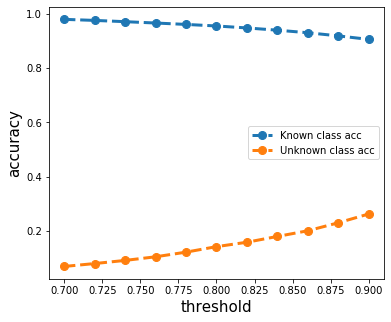

In [33]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_xlabel('threshold', fontsize=15)
ax.set_ylabel('accuracy', fontsize=15)

ax.plot(threshold_list, 
        known_accs,  
        label='Known class acc', 
        marker='o', 
        linestyle='dashed',
        linewidth=3, 
        markersize=8)
ax.plot(threshold_list, 
        unknown_accs, 
        label="Unknown class acc",
        marker='o', 
        linestyle='dashed',
        linewidth=3, 
        markersize=8)
ax.legend()
plt.show()

## Count where the samples exit

In [34]:
import matplotlib.pyplot as plt

In [35]:
known_exit, known_rts, unknown_exit, unknown_rts, predictions = get_exit_stats(original_labels=original_labels,
                                                                                target_labels=target_labels,
                                                                                probs=probs,
                                                                                rts=rts,
                                                                               top_1_threshold=0.90)

In [36]:
known_exit_count = np.unique(np.array(known_exit), return_counts=True)

In [37]:
known_exit_count[1]

array([30728,  3467,  1055,   272,  3828])

<BarContainer object of 5 artists>

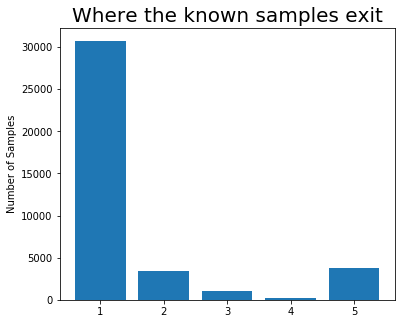

In [38]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_ylabel('Number of Samples', fontsize=10)
ax.set_title('Where the known samples exit', fontsize=20)

ax.bar(known_exit_count[0]+1, height=known_exit_count[1])

In [39]:
unknown_exit_count = np.unique(np.array(unknown_exit), return_counts=True)

<BarContainer object of 5 artists>

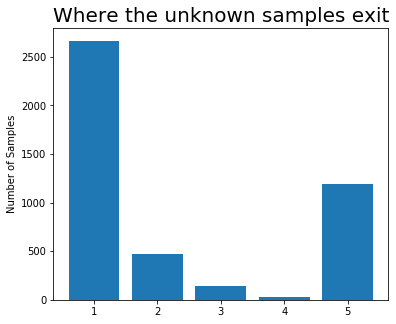

In [40]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.set_ylabel('Number of Samples', fontsize=10)
ax.set_title('Where the unknown samples exit', fontsize=20)

ax.bar(unknown_exit_count[0]+1, height=unknown_exit_count[1])

## Count the CM for known and unknown

In [41]:
known_accs, unknown_accs = get_threshold_curve(thresholds=[0.9])

35637 3713 3317 1183


In [42]:
print(known_accs, unknown_accs)

[0.9056416772554002] [0.2628888888888889]


In [43]:
known_rts_clf5 = rts[:len(known_exit), 4]
unknown_rts_clf = rts[len(known_exit):, 4]

In [44]:
print(np.median(known_rts_clf5),np.median(unknown_rts_clf))

0.02931975293904543 0.03172642318531871


In [45]:
print(np.mean(known_rts_clf5),np.mean(unknown_rts_clf))

0.030699893621895864 0.03267030275933858


In [46]:
print(np.median(known_rts),np.median(unknown_rts))

0.009946127887815237 0.01151929353363812


In [47]:
print(np.mean(known_rts),np.mean(unknown_rts))

0.013426438220474854 0.01816980642101003
